In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/kaggle/input/sales-forecasting/train.csv")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [3]:
df['Sub-Category'].unique

<bound method Series.unique of 0         Bookcases
1            Chairs
2            Labels
3            Tables
4           Storage
           ...     
9795        Binders
9796            Art
9797         Phones
9798         Phones
9799    Accessories
Name: Sub-Category, Length: 9800, dtype: object>

In [4]:
df["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [5]:
one_hot = pd.get_dummies(df.Segment)
df = df.join(one_hot)
df = df.drop("Segment", axis = 1)
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Consumer,Corporate,Home Office
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,True,False,False
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,True,False,False
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,False,True,False
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,True,False,False
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,False,True,False
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,False,True,False
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,False,True,False
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,False,True,False


In [6]:
df.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [7]:
one_hot = pd.get_dummies(df.Category)
df = df.join(one_hot)
df = df.drop("Category", axis = 1)
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Country,City,State,...,Product ID,Sub-Category,Product Name,Sales,Consumer,Corporate,Home Office,Furniture,Office Supplies,Technology
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,United States,Henderson,Kentucky,...,FUR-BO-10001798,Bookcases,Bush Somerset Collection Bookcase,261.9600,True,False,False,True,False,False
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,United States,Henderson,Kentucky,...,FUR-CH-10000454,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,True,False,False,True,False,False
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,United States,Los Angeles,California,...,OFF-LA-10000240,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,False,True,False,False,True,False
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,True,False,False,True,False,False
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,United States,Fort Lauderdale,Florida,...,OFF-ST-10000760,Storage,Eldon Fold 'N Roll Cart System,22.3680,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,United States,Chicago,Illinois,...,OFF-BI-10003429,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,False,True,False,False,True,False
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,United States,Toledo,Ohio,...,OFF-AR-10001374,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,False,True,False,False,True,False
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,United States,Toledo,Ohio,...,TEC-PH-10004977,Phones,GE 30524EE4,235.1880,False,True,False,False,False,True
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,United States,Toledo,Ohio,...,TEC-PH-10000912,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,False,True,False,False,False,True


In [8]:
df.Country.unique()

array(['United States'], dtype=object)

In [9]:
df = df.drop("Country", axis = 1)

In [10]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,City,State,Postal Code,...,Product ID,Sub-Category,Product Name,Sales,Consumer,Corporate,Home Office,Furniture,Office Supplies,Technology
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Henderson,Kentucky,42420.0,...,FUR-BO-10001798,Bookcases,Bush Somerset Collection Bookcase,261.9600,True,False,False,True,False,False
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Henderson,Kentucky,42420.0,...,FUR-CH-10000454,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,True,False,False,True,False,False
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Los Angeles,California,90036.0,...,OFF-LA-10000240,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,False,True,False,False,True,False
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Fort Lauderdale,Florida,33311.0,...,FUR-TA-10000577,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,True,False,False,True,False,False
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Fort Lauderdale,Florida,33311.0,...,OFF-ST-10000760,Storage,Eldon Fold 'N Roll Cart System,22.3680,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Chicago,Illinois,60610.0,...,OFF-BI-10003429,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,False,True,False,False,True,False
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Toledo,Ohio,43615.0,...,OFF-AR-10001374,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,False,True,False,False,True,False
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Toledo,Ohio,43615.0,...,TEC-PH-10004977,Phones,GE 30524EE4,235.1880,False,True,False,False,False,True
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Toledo,Ohio,43615.0,...,TEC-PH-10000912,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,False,True,False,False,False,True


In [11]:
df["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [12]:
one_hot = pd.get_dummies(df["Ship Mode"])
df = df.join(one_hot)
df = df.drop("Ship Mode", axis = 1)
df

,Row ID,Order ID,Order Date,Ship Date,Customer ID,Customer Name,City,State,Postal Code,Region,...,Consumer,Corporate,Home Office,Furniture,Office Supplies,Technology,First Class,Same Day,Second Class,Standard Class
0,1,CA-2017-152156,08/11/2017,11/11/2017,CG-12520,Claire Gute,Henderson,Kentucky,42420.0,South,...,True,False,False,True,False,False,False,False,True,False
1,2,CA-2017-152156,08/11/2017,11/11/2017,CG-12520,Claire Gute,Henderson,Kentucky,42420.0,South,...,True,False,False,True,False,False,False,False,True,False
2,3,CA-2017-138688,12/06/2017,16/06/2017,DV-13045,Darrin Van Huff,Los Angeles,California,90036.0,West,...,False,True,False,False,True,False,False,False,True,False
3,4,US-2016-108966,11/10/2016,18/10/2016,SO-20335,Sean O'Donnell,Fort Lauderdale,Florida,33311.0,South,...,True,False,False,True,False,False,False,False,False,True
4,5,US-2016-108966,11/10/2016,18/10/2016,SO-20335,Sean O'Donnell,Fort Lauderdale,Florida,33311.0,South,...,True,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,SH-19975,Sally Hughsby,Chicago,Illinois,60610.0,Central,...,False,True,False,False,True,False,False,False,False,True
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,CS-12490,Cindy Schnelling,Toledo,Ohio,43615.0,East,...,False,True,False,False,True,False,False,False,False,True
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,CS-12490,Cindy Schnelling,Toledo,Ohio,43615.0,East,...,False,True,False,False,False,True,False,False,False,True
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,CS-12490,Cindy Schnelling,Toledo,Ohio,43615.0,East,...,False,True,False,False,False,True,False,False,False,True


In [13]:
len(df["Customer Name"].unique())

793

In [14]:
df = df.drop("Row ID", axis = 1)
df

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,City,State,Postal Code,Region,Product ID,...,Consumer,Corporate,Home Office,Furniture,Office Supplies,Technology,First Class,Same Day,Second Class,Standard Class
0,CA-2017-152156,08/11/2017,11/11/2017,CG-12520,Claire Gute,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,...,True,False,False,True,False,False,False,False,True,False
1,CA-2017-152156,08/11/2017,11/11/2017,CG-12520,Claire Gute,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,...,True,False,False,True,False,False,False,False,True,False
2,CA-2017-138688,12/06/2017,16/06/2017,DV-13045,Darrin Van Huff,Los Angeles,California,90036.0,West,OFF-LA-10000240,...,False,True,False,False,True,False,False,False,True,False
3,US-2016-108966,11/10/2016,18/10/2016,SO-20335,Sean O'Donnell,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,...,True,False,False,True,False,False,False,False,False,True
4,US-2016-108966,11/10/2016,18/10/2016,SO-20335,Sean O'Donnell,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,...,True,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,21/05/2017,28/05/2017,SH-19975,Sally Hughsby,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,...,False,True,False,False,True,False,False,False,False,True
9796,CA-2016-128608,12/01/2016,17/01/2016,CS-12490,Cindy Schnelling,Toledo,Ohio,43615.0,East,OFF-AR-10001374,...,False,True,False,False,True,False,False,False,False,True
9797,CA-2016-128608,12/01/2016,17/01/2016,CS-12490,Cindy Schnelling,Toledo,Ohio,43615.0,East,TEC-PH-10004977,...,False,True,False,False,False,True,False,False,False,True
9798,CA-2016-128608,12/01/2016,17/01/2016,CS-12490,Cindy Schnelling,Toledo,Ohio,43615.0,East,TEC-PH-10000912,...,False,True,False,False,False,True,False,False,False,True


In [15]:
df.Region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [16]:
one_hot = pd.get_dummies(df.Region)
df = df.join(one_hot)
df = df.drop("Region", axis = 1)
df

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,City,State,Postal Code,Product ID,Sub-Category,...,Office Supplies,Technology,First Class,Same Day,Second Class,Standard Class,Central,East,South,West
0,CA-2017-152156,08/11/2017,11/11/2017,CG-12520,Claire Gute,Henderson,Kentucky,42420.0,FUR-BO-10001798,Bookcases,...,False,False,False,False,True,False,False,False,True,False
1,CA-2017-152156,08/11/2017,11/11/2017,CG-12520,Claire Gute,Henderson,Kentucky,42420.0,FUR-CH-10000454,Chairs,...,False,False,False,False,True,False,False,False,True,False
2,CA-2017-138688,12/06/2017,16/06/2017,DV-13045,Darrin Van Huff,Los Angeles,California,90036.0,OFF-LA-10000240,Labels,...,True,False,False,False,True,False,False,False,False,True
3,US-2016-108966,11/10/2016,18/10/2016,SO-20335,Sean O'Donnell,Fort Lauderdale,Florida,33311.0,FUR-TA-10000577,Tables,...,False,False,False,False,False,True,False,False,True,False
4,US-2016-108966,11/10/2016,18/10/2016,SO-20335,Sean O'Donnell,Fort Lauderdale,Florida,33311.0,OFF-ST-10000760,Storage,...,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,21/05/2017,28/05/2017,SH-19975,Sally Hughsby,Chicago,Illinois,60610.0,OFF-BI-10003429,Binders,...,True,False,False,False,False,True,True,False,False,False
9796,CA-2016-128608,12/01/2016,17/01/2016,CS-12490,Cindy Schnelling,Toledo,Ohio,43615.0,OFF-AR-10001374,Art,...,True,False,False,False,False,True,False,True,False,False
9797,CA-2016-128608,12/01/2016,17/01/2016,CS-12490,Cindy Schnelling,Toledo,Ohio,43615.0,TEC-PH-10004977,Phones,...,False,True,False,False,False,True,False,True,False,False
9798,CA-2016-128608,12/01/2016,17/01/2016,CS-12490,Cindy Schnelling,Toledo,Ohio,43615.0,TEC-PH-10000912,Phones,...,False,True,False,False,False,True,False,True,False,False


In [17]:
list(df.columns)

['Order ID',
 'Order Date',
 'Ship Date',
 'Customer ID',
 'Customer Name',
 'City',
 'State',
 'Postal Code',
 'Product ID',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Consumer',
 'Corporate',
 'Home Office',
 'Furniture',
 'Office Supplies',
 'Technology',
 'First Class',
 'Same Day',
 'Second Class',
 'Standard Class',
 'Central',
 'East',
 'South',
 'West']

In [18]:
len(df.City.unique())

529

In [19]:
len(df.State.unique())

49

In [20]:
len(df["Sub-Category"].unique())

17

In [21]:
df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]]

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,City,State,Postal Code,Product ID,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,CG-12520,Claire Gute,Henderson,Kentucky,42420.0,FUR-BO-10001798,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,CG-12520,Claire Gute,Henderson,Kentucky,42420.0,FUR-CH-10000454,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,DV-13045,Darrin Van Huff,Los Angeles,California,90036.0,OFF-LA-10000240,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,SO-20335,Sean O'Donnell,Fort Lauderdale,Florida,33311.0,FUR-TA-10000577,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,SO-20335,Sean O'Donnell,Fort Lauderdale,Florida,33311.0,OFF-ST-10000760,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,21/05/2017,28/05/2017,SH-19975,Sally Hughsby,Chicago,Illinois,60610.0,OFF-BI-10003429,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,CA-2016-128608,12/01/2016,17/01/2016,CS-12490,Cindy Schnelling,Toledo,Ohio,43615.0,OFF-AR-10001374,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,CA-2016-128608,12/01/2016,17/01/2016,CS-12490,Cindy Schnelling,Toledo,Ohio,43615.0,TEC-PH-10004977,Phones,GE 30524EE4,235.1880
9798,CA-2016-128608,12/01/2016,17/01/2016,CS-12490,Cindy Schnelling,Toledo,Ohio,43615.0,TEC-PH-10000912,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [22]:
df["Sequence"] = df["Order ID"].str.slice(8,14)
df["Sequence"]

0       152156
1       152156
2       138688
3       108966
4       108966
         ...  
9795    125920
9796    128608
9797    128608
9798    128608
9799    128608
Name: Sequence, Length: 9800, dtype: object

In [23]:
df = df.sort_values(by = 'Sequence')

In [24]:
df

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,City,State,Postal Code,Product ID,Sub-Category,...,Technology,First Class,Same Day,Second Class,Standard Class,Central,East,South,West,Sequence
2717,CA-2015-100006,07/09/2015,13/09/2015,DK-13375,Dennis Kane,New York City,New York,10024.0,TEC-PH-10002075,Phones,...,True,False,False,False,True,False,True,False,False,100006
1228,CA-2018-100013,06/11/2018,11/11/2018,ZC-21910,Zuschuss Carroll,Los Angeles,California,90045.0,OFF-EN-10001219,Envelopes,...,False,False,False,False,True,False,False,False,True,100013
1229,CA-2018-100013,06/11/2018,11/11/2018,ZC-21910,Zuschuss Carroll,Los Angeles,California,90045.0,FUR-FU-10001424,Furnishings,...,False,False,False,False,True,False,False,False,True,100013
1230,CA-2018-100013,06/11/2018,11/11/2018,ZC-21910,Zuschuss Carroll,Los Angeles,California,90045.0,OFF-AR-10001022,Art,...,False,False,False,False,True,False,False,False,True,100013
4406,CA-2017-100041,20/11/2017,25/11/2017,BF-10975,Barbara Fisher,Columbus,Indiana,47201.0,OFF-PA-10001622,Paper,...,False,False,False,False,True,True,False,False,False,100041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4031,CA-2017-169957,26/09/2017,30/09/2017,SN-20710,Steve Nguyen,Covington,Washington,98042.0,OFF-AP-10000576,Appliances,...,False,False,False,False,True,False,False,False,True,169957
3788,CA-2017-169971,04/09/2017,09/09/2017,IL-15100,Ivan Liston,Houston,Texas,77041.0,OFF-AR-10001044,Art,...,False,False,False,False,True,True,False,False,False,169971
3787,CA-2017-169971,04/09/2017,09/09/2017,IL-15100,Ivan Liston,Houston,Texas,77041.0,OFF-AR-10002804,Art,...,False,False,False,False,True,True,False,False,False,169971
3314,CA-2018-169978,24/12/2018,28/12/2018,HG-15025,Hunter Glantz,Oceanside,New York,11572.0,FUR-CH-10002602,Chairs,...,False,False,False,False,True,False,True,False,False,169978


In [25]:
df = df.reset_index()

In [26]:
df

,index,Order ID,Order Date,Ship Date,Customer ID,Customer Name,City,State,Postal Code,Product ID,...,Technology,First Class,Same Day,Second Class,Standard Class,Central,East,South,West,Sequence
0,2717,CA-2015-100006,07/09/2015,13/09/2015,DK-13375,Dennis Kane,New York City,New York,10024.0,TEC-PH-10002075,...,True,False,False,False,True,False,True,False,False,100006
1,1228,CA-2018-100013,06/11/2018,11/11/2018,ZC-21910,Zuschuss Carroll,Los Angeles,California,90045.0,OFF-EN-10001219,...,False,False,False,False,True,False,False,False,True,100013
2,1229,CA-2018-100013,06/11/2018,11/11/2018,ZC-21910,Zuschuss Carroll,Los Angeles,California,90045.0,FUR-FU-10001424,...,False,False,False,False,True,False,False,False,True,100013
3,1230,CA-2018-100013,06/11/2018,11/11/2018,ZC-21910,Zuschuss Carroll,Los Angeles,California,90045.0,OFF-AR-10001022,...,False,False,False,False,True,False,False,False,True,100013
4,4406,CA-2017-100041,20/11/2017,25/11/2017,BF-10975,Barbara Fisher,Columbus,Indiana,47201.0,OFF-PA-10001622,...,False,False,False,False,True,True,False,False,False,100041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,4031,CA-2017-169957,26/09/2017,30/09/2017,SN-20710,Steve Nguyen,Covington,Washington,98042.0,OFF-AP-10000576,...,False,False,False,False,True,False,False,False,True,169957
9796,3788,CA-2017-169971,04/09/2017,09/09/2017,IL-15100,Ivan Liston,Houston,Texas,77041.0,OFF-AR-10001044,...,False,False,False,False,True,True,False,False,False,169971
9797,3787,CA-2017-169971,04/09/2017,09/09/2017,IL-15100,Ivan Liston,Houston,Texas,77041.0,OFF-AR-10002804,...,False,False,False,False,True,True,False,False,False,169971
9798,3314,CA-2018-169978,24/12/2018,28/12/2018,HG-15025,Hunter Glantz,Oceanside,New York,11572.0,FUR-CH-10002602,...,False,False,False,False,True,False,True,False,False,169978


In [27]:
df["1st 2 char of Order ID"] = df["Order ID"].str.slice(0,2)
df["1st 2 char of Order ID"].unique()

array(['CA', 'US'], dtype=object)

In [28]:
one_hot = pd.get_dummies(df["1st 2 char of Order ID"])
df = df.join(one_hot)
df = df.drop("1st 2 char of Order ID", axis = 1)
df

,index,Order ID,Order Date,Ship Date,Customer ID,Customer Name,City,State,Postal Code,Product ID,...,Same Day,Second Class,Standard Class,Central,East,South,West,Sequence,CA,US
0,2717,CA-2015-100006,07/09/2015,13/09/2015,DK-13375,Dennis Kane,New York City,New York,10024.0,TEC-PH-10002075,...,False,False,True,False,True,False,False,100006,True,False
1,1228,CA-2018-100013,06/11/2018,11/11/2018,ZC-21910,Zuschuss Carroll,Los Angeles,California,90045.0,OFF-EN-10001219,...,False,False,True,False,False,False,True,100013,True,False
2,1229,CA-2018-100013,06/11/2018,11/11/2018,ZC-21910,Zuschuss Carroll,Los Angeles,California,90045.0,FUR-FU-10001424,...,False,False,True,False,False,False,True,100013,True,False
3,1230,CA-2018-100013,06/11/2018,11/11/2018,ZC-21910,Zuschuss Carroll,Los Angeles,California,90045.0,OFF-AR-10001022,...,False,False,True,False,False,False,True,100013,True,False
4,4406,CA-2017-100041,20/11/2017,25/11/2017,BF-10975,Barbara Fisher,Columbus,Indiana,47201.0,OFF-PA-10001622,...,False,False,True,True,False,False,False,100041,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,4031,CA-2017-169957,26/09/2017,30/09/2017,SN-20710,Steve Nguyen,Covington,Washington,98042.0,OFF-AP-10000576,...,False,False,True,False,False,False,True,169957,True,False
9796,3788,CA-2017-169971,04/09/2017,09/09/2017,IL-15100,Ivan Liston,Houston,Texas,77041.0,OFF-AR-10001044,...,False,False,True,True,False,False,False,169971,True,False
9797,3787,CA-2017-169971,04/09/2017,09/09/2017,IL-15100,Ivan Liston,Houston,Texas,77041.0,OFF-AR-10002804,...,False,False,True,True,False,False,False,169971,True,False
9798,3314,CA-2018-169978,24/12/2018,28/12/2018,HG-15025,Hunter Glantz,Oceanside,New York,11572.0,FUR-CH-10002602,...,False,False,True,False,True,False,False,169978,True,False


In [29]:
df = df.drop("index", axis = 1)
df

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,City,State,Postal Code,Product ID,Sub-Category,...,Same Day,Second Class,Standard Class,Central,East,South,West,Sequence,CA,US
0,CA-2015-100006,07/09/2015,13/09/2015,DK-13375,Dennis Kane,New York City,New York,10024.0,TEC-PH-10002075,Phones,...,False,False,True,False,True,False,False,100006,True,False
1,CA-2018-100013,06/11/2018,11/11/2018,ZC-21910,Zuschuss Carroll,Los Angeles,California,90045.0,OFF-EN-10001219,Envelopes,...,False,False,True,False,False,False,True,100013,True,False
2,CA-2018-100013,06/11/2018,11/11/2018,ZC-21910,Zuschuss Carroll,Los Angeles,California,90045.0,FUR-FU-10001424,Furnishings,...,False,False,True,False,False,False,True,100013,True,False
3,CA-2018-100013,06/11/2018,11/11/2018,ZC-21910,Zuschuss Carroll,Los Angeles,California,90045.0,OFF-AR-10001022,Art,...,False,False,True,False,False,False,True,100013,True,False
4,CA-2017-100041,20/11/2017,25/11/2017,BF-10975,Barbara Fisher,Columbus,Indiana,47201.0,OFF-PA-10001622,Paper,...,False,False,True,True,False,False,False,100041,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-169957,26/09/2017,30/09/2017,SN-20710,Steve Nguyen,Covington,Washington,98042.0,OFF-AP-10000576,Appliances,...,False,False,True,False,False,False,True,169957,True,False
9796,CA-2017-169971,04/09/2017,09/09/2017,IL-15100,Ivan Liston,Houston,Texas,77041.0,OFF-AR-10001044,Art,...,False,False,True,True,False,False,False,169971,True,False
9797,CA-2017-169971,04/09/2017,09/09/2017,IL-15100,Ivan Liston,Houston,Texas,77041.0,OFF-AR-10002804,Art,...,False,False,True,True,False,False,False,169971,True,False
9798,CA-2018-169978,24/12/2018,28/12/2018,HG-15025,Hunter Glantz,Oceanside,New York,11572.0,FUR-CH-10002602,Chairs,...,False,False,True,False,True,False,False,169978,True,False


In [30]:
len(df["Postal Code"].unique())

627

In [31]:
len(df["Sub-Category"].unique())

17

In [32]:
one_hot = pd.get_dummies(df["Sub-Category"])
df = df.join(one_hot)
df = df.drop("Sub-Category", axis = 1)
df

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,City,State,Postal Code,Product ID,Product Name,...,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
0,CA-2015-100006,07/09/2015,13/09/2015,DK-13375,Dennis Kane,New York City,New York,10024.0,TEC-PH-10002075,AT&T EL51110 DECT,...,False,False,False,False,False,False,True,False,False,False
1,CA-2018-100013,06/11/2018,11/11/2018,ZC-21910,Zuschuss Carroll,Los Angeles,California,90045.0,OFF-EN-10001219,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",...,True,False,False,False,False,False,False,False,False,False
2,CA-2018-100013,06/11/2018,11/11/2018,ZC-21910,Zuschuss Carroll,Los Angeles,California,90045.0,FUR-FU-10001424,Dax Clear Box Frame,...,False,False,True,False,False,False,False,False,False,False
3,CA-2018-100013,06/11/2018,11/11/2018,ZC-21910,Zuschuss Carroll,Los Angeles,California,90045.0,OFF-AR-10001022,SANFORD Liquid Accent Tank-Style Highlighters,...,False,False,False,False,False,False,False,False,False,False
4,CA-2017-100041,20/11/2017,25/11/2017,BF-10975,Barbara Fisher,Columbus,Indiana,47201.0,OFF-PA-10001622,"Ampad Poly Cover Wirebound Steno Book, 6"" x 9""...",...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-169957,26/09/2017,30/09/2017,SN-20710,Steve Nguyen,Covington,Washington,98042.0,OFF-AP-10000576,Belkin 7 Outlet SurgeMaster II,...,False,False,False,False,False,False,False,False,False,False
9796,CA-2017-169971,04/09/2017,09/09/2017,IL-15100,Ivan Liston,Houston,Texas,77041.0,OFF-AR-10001044,"BOSTON Ranger #55 Pencil Sharpener, Black",...,False,False,False,False,False,False,False,False,False,False
9797,CA-2017-169971,04/09/2017,09/09/2017,IL-15100,Ivan Liston,Houston,Texas,77041.0,OFF-AR-10002804,Faber Castell Col-Erase Pencils,...,False,False,False,False,False,False,False,False,False,False
9798,CA-2018-169978,24/12/2018,28/12/2018,HG-15025,Hunter Glantz,Oceanside,New York,11572.0,FUR-CH-10002602,DMI Arturo Collection Mission-style Design Woo...,...,False,False,False,False,False,False,False,False,False,False


In [33]:
list(df.columns)

['Order ID',
 'Order Date',
 'Ship Date',
 'Customer ID',
 'Customer Name',
 'City',
 'State',
 'Postal Code',
 'Product ID',
 'Product Name',
 'Sales',
 'Consumer',
 'Corporate',
 'Home Office',
 'Furniture',
 'Office Supplies',
 'Technology',
 'First Class',
 'Same Day',
 'Second Class',
 'Standard Class',
 'Central',
 'East',
 'South',
 'West',
 'Sequence',
 'CA',
 'US',
 'Accessories',
 'Appliances',
 'Art',
 'Binders',
 'Bookcases',
 'Chairs',
 'Copiers',
 'Envelopes',
 'Fasteners',
 'Furnishings',
 'Labels',
 'Machines',
 'Paper',
 'Phones',
 'Storage',
 'Supplies',
 'Tables']

In [34]:
df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,City,State,Postal Code,Product ID,Product Name,Sales
0,CA-2015-100006,07/09/2015,13/09/2015,DK-13375,Dennis Kane,New York City,New York,10024.0,TEC-PH-10002075,AT&T EL51110 DECT,377.970
1,CA-2018-100013,06/11/2018,11/11/2018,ZC-21910,Zuschuss Carroll,Los Angeles,California,90045.0,OFF-EN-10001219,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",15.280
2,CA-2018-100013,06/11/2018,11/11/2018,ZC-21910,Zuschuss Carroll,Los Angeles,California,90045.0,FUR-FU-10001424,Dax Clear Box Frame,8.730
3,CA-2018-100013,06/11/2018,11/11/2018,ZC-21910,Zuschuss Carroll,Los Angeles,California,90045.0,OFF-AR-10001022,SANFORD Liquid Accent Tank-Style Highlighters,5.680
4,CA-2017-100041,20/11/2017,25/11/2017,BF-10975,Barbara Fisher,Columbus,Indiana,47201.0,OFF-PA-10001622,"Ampad Poly Cover Wirebound Steno Book, 6"" x 9""...",9.080
...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-169957,26/09/2017,30/09/2017,SN-20710,Steve Nguyen,Covington,Washington,98042.0,OFF-AP-10000576,Belkin 7 Outlet SurgeMaster II,236.880
9796,CA-2017-169971,04/09/2017,09/09/2017,IL-15100,Ivan Liston,Houston,Texas,77041.0,OFF-AR-10001044,"BOSTON Ranger #55 Pencil Sharpener, Black",62.376
9797,CA-2017-169971,04/09/2017,09/09/2017,IL-15100,Ivan Liston,Houston,Texas,77041.0,OFF-AR-10002804,Faber Castell Col-Erase Pencils,3.912
9798,CA-2018-169978,24/12/2018,28/12/2018,HG-15025,Hunter Glantz,Oceanside,New York,11572.0,FUR-CH-10002602,DMI Arturo Collection Mission-style Design Woo...,271.764


In [35]:
df["year"] = df["Order ID"].str.slice(3,7)
df = df.sort_values(by = 'year')
df

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,City,State,Postal Code,Product ID,Product Name,...,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables,year
0,CA-2015-100006,07/09/2015,13/09/2015,DK-13375,Dennis Kane,New York City,New York,10024.0,TEC-PH-10002075,AT&T EL51110 DECT,...,False,False,False,False,False,True,False,False,False,2015
4260,CA-2015-129364,08/12/2015,13/12/2015,TB-21250,Tim Brockman,Salem,Oregon,97301.0,OFF-LA-10004409,Avery 492,...,False,False,True,False,False,False,False,False,False,2015
4261,CA-2015-129364,08/12/2015,13/12/2015,TB-21250,Tim Brockman,Salem,Oregon,97301.0,TEC-AC-10004227,SanDisk Ultra 16 GB MicroSDHC Class 10 Memory ...,...,False,False,False,False,False,False,False,False,False,2015
4285,CA-2015-129574,26/05/2015,29/05/2015,Dp-13240,Dean percer,Murray,Utah,84107.0,OFF-PA-10002893,"Wirebound Service Call Books, 5 1/2"" x 4""",...,False,False,False,False,True,False,False,False,False,2015
4287,US-2015-129609,22/03/2015,22/03/2015,VM-21835,Vivian Mathis,Portage,Indiana,46368.0,OFF-AR-10003478,Avery Hi-Liter EverBold Pen Style Fluorescent ...,...,False,False,False,False,False,False,False,False,False,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,CA-2018-149706,11/12/2018,12/12/2018,AS-10285,Alejandro Savely,Palatine,Illinois,60067.0,TEC-AC-10001284,Enermax Briskie RF Wireless Keyboard and Mouse...,...,False,False,False,False,False,False,False,False,False,2018
3958,CA-2018-127397,24/02/2018,28/02/2018,ES-14080,Erin Smith,Philadelphia,Pennsylvania,19134.0,TEC-AC-10003033,Plantronics CS510 - Over-the-Head monaural Wir...,...,False,False,False,False,False,False,False,False,False,2018
7075,CA-2018-149720,04/06/2018,07/06/2018,EM-14065,Erin Mull,Frisco,Texas,75034.0,FUR-FU-10002501,Nu-Dell Executive Frame,...,False,True,False,False,False,False,False,False,False,2018
1158,CA-2018-108000,12/01/2018,16/01/2018,LS-16945,Linda Southworth,San Francisco,California,94110.0,OFF-EN-10002621,Staple envelope,...,False,False,False,False,False,False,False,False,False,2018


In [36]:
df = df.reset_index()

In [37]:
df

,index,Order ID,Order Date,Ship Date,Customer ID,Customer Name,City,State,Postal Code,Product ID,...,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables,year
0,0,CA-2015-100006,07/09/2015,13/09/2015,DK-13375,Dennis Kane,New York City,New York,10024.0,TEC-PH-10002075,...,False,False,False,False,False,True,False,False,False,2015
1,4260,CA-2015-129364,08/12/2015,13/12/2015,TB-21250,Tim Brockman,Salem,Oregon,97301.0,OFF-LA-10004409,...,False,False,True,False,False,False,False,False,False,2015
2,4261,CA-2015-129364,08/12/2015,13/12/2015,TB-21250,Tim Brockman,Salem,Oregon,97301.0,TEC-AC-10004227,...,False,False,False,False,False,False,False,False,False,2015
3,4285,CA-2015-129574,26/05/2015,29/05/2015,Dp-13240,Dean percer,Murray,Utah,84107.0,OFF-PA-10002893,...,False,False,False,False,True,False,False,False,False,2015
4,4287,US-2015-129609,22/03/2015,22/03/2015,VM-21835,Vivian Mathis,Portage,Indiana,46368.0,OFF-AR-10003478,...,False,False,False,False,False,False,False,False,False,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,7071,CA-2018-149706,11/12/2018,12/12/2018,AS-10285,Alejandro Savely,Palatine,Illinois,60067.0,TEC-AC-10001284,...,False,False,False,False,False,False,False,False,False,2018
9796,3958,CA-2018-127397,24/02/2018,28/02/2018,ES-14080,Erin Smith,Philadelphia,Pennsylvania,19134.0,TEC-AC-10003033,...,False,False,False,False,False,False,False,False,False,2018
9797,7075,CA-2018-149720,04/06/2018,07/06/2018,EM-14065,Erin Mull,Frisco,Texas,75034.0,FUR-FU-10002501,...,False,True,False,False,False,False,False,False,False,2018
9798,1158,CA-2018-108000,12/01/2018,16/01/2018,LS-16945,Linda Southworth,San Francisco,California,94110.0,OFF-EN-10002621,...,False,False,False,False,False,False,False,False,False,2018


In [38]:
df = df.drop("index", axis = 1)

In [39]:
df

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,City,State,Postal Code,Product ID,Product Name,...,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables,year
0,CA-2015-100006,07/09/2015,13/09/2015,DK-13375,Dennis Kane,New York City,New York,10024.0,TEC-PH-10002075,AT&T EL51110 DECT,...,False,False,False,False,False,True,False,False,False,2015
1,CA-2015-129364,08/12/2015,13/12/2015,TB-21250,Tim Brockman,Salem,Oregon,97301.0,OFF-LA-10004409,Avery 492,...,False,False,True,False,False,False,False,False,False,2015
2,CA-2015-129364,08/12/2015,13/12/2015,TB-21250,Tim Brockman,Salem,Oregon,97301.0,TEC-AC-10004227,SanDisk Ultra 16 GB MicroSDHC Class 10 Memory ...,...,False,False,False,False,False,False,False,False,False,2015
3,CA-2015-129574,26/05/2015,29/05/2015,Dp-13240,Dean percer,Murray,Utah,84107.0,OFF-PA-10002893,"Wirebound Service Call Books, 5 1/2"" x 4""",...,False,False,False,False,True,False,False,False,False,2015
4,US-2015-129609,22/03/2015,22/03/2015,VM-21835,Vivian Mathis,Portage,Indiana,46368.0,OFF-AR-10003478,Avery Hi-Liter EverBold Pen Style Fluorescent ...,...,False,False,False,False,False,False,False,False,False,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2018-149706,11/12/2018,12/12/2018,AS-10285,Alejandro Savely,Palatine,Illinois,60067.0,TEC-AC-10001284,Enermax Briskie RF Wireless Keyboard and Mouse...,...,False,False,False,False,False,False,False,False,False,2018
9796,CA-2018-127397,24/02/2018,28/02/2018,ES-14080,Erin Smith,Philadelphia,Pennsylvania,19134.0,TEC-AC-10003033,Plantronics CS510 - Over-the-Head monaural Wir...,...,False,False,False,False,False,False,False,False,False,2018
9797,CA-2018-149720,04/06/2018,07/06/2018,EM-14065,Erin Mull,Frisco,Texas,75034.0,FUR-FU-10002501,Nu-Dell Executive Frame,...,False,True,False,False,False,False,False,False,False,2018
9798,CA-2018-108000,12/01/2018,16/01/2018,LS-16945,Linda Southworth,San Francisco,California,94110.0,OFF-EN-10002621,Staple envelope,...,False,False,False,False,False,False,False,False,False,2018


In [40]:
df["order_num"] = df["Order ID"].str.slice(8,14)
df["order_num"]

0       100006
1       129364
2       129364
3       129574
4       129609
         ...  
9795    149706
9796    127397
9797    149720
9798    108000
9799    169978
Name: order_num, Length: 9800, dtype: object

In [41]:
df['year'] = df['year'].astype(int)
df['order_num'] = df['order_num'].astype(int)
df = df.sort_values(by=['year', 'order_num'])
df

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,City,State,Postal Code,Product ID,Product Name,...,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables,year,order_num
0,CA-2015-100006,07/09/2015,13/09/2015,DK-13375,Dennis Kane,New York City,New York,10024.0,TEC-PH-10002075,AT&T EL51110 DECT,...,False,False,False,False,True,False,False,False,2015,100006
1892,CA-2015-100090,08/07/2015,12/07/2015,EB-13705,Ed Braxton,San Francisco,California,94122.0,FUR-TA-10003715,Hon 2111 Invitation Series Corner Table,...,False,False,False,False,False,False,False,True,2015,100090
1905,CA-2015-100090,08/07/2015,12/07/2015,EB-13705,Ed Braxton,San Francisco,California,94122.0,OFF-BI-10001597,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",...,False,False,False,False,False,False,False,False,2015,100090
1904,US-2015-100279,10/03/2015,14/03/2015,SW-20275,Scott Williamson,Royal Oak,Michigan,48073.0,OFF-PA-10002259,"Geographics Note Cards, Blank, White, 8 1/2"" x...",...,False,False,False,True,False,False,False,False,2015,100279
1952,CA-2015-100293,14/03/2015,18/03/2015,NF-18475,Neil Französisch,Jacksonville,Florida,32216.0,OFF-PA-10000176,Xerox 1887,...,False,False,False,True,False,False,False,False,2015,100293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6971,CA-2018-169894,24/11/2018,29/11/2018,MV-17485,Mark Van Huff,Mesa,Arizona,85204.0,OFF-BI-10004230,GBC Recycled Grain Textured Covers,...,False,False,False,False,False,False,False,False,2018,169894
6969,CA-2018-169901,15/06/2018,19/06/2018,CC-12550,Clay Cheatham,San Francisco,California,94122.0,TEC-PH-10002293,Anker 36W 4-Port USB Wall Charger Travel Power...,...,False,False,False,False,True,False,False,False,2018,169901
6954,CA-2018-169929,25/09/2018,28/09/2018,LS-17200,Luke Schmidt,Helena,Montana,59601.0,OFF-ST-10002352,Iris Project Case,...,False,False,False,False,False,True,False,False,2018,169929
8652,CA-2018-169978,24/12/2018,28/12/2018,HG-15025,Hunter Glantz,Oceanside,New York,11572.0,FUR-CH-10002602,DMI Arturo Collection Mission-style Design Woo...,...,False,False,False,False,False,False,False,False,2018,169978


In [42]:
df = df.reset_index()
df = df.drop("index", axis = 1)
df

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,City,State,Postal Code,Product ID,Product Name,...,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables,year,order_num
0,CA-2015-100006,07/09/2015,13/09/2015,DK-13375,Dennis Kane,New York City,New York,10024.0,TEC-PH-10002075,AT&T EL51110 DECT,...,False,False,False,False,True,False,False,False,2015,100006
1,CA-2015-100090,08/07/2015,12/07/2015,EB-13705,Ed Braxton,San Francisco,California,94122.0,FUR-TA-10003715,Hon 2111 Invitation Series Corner Table,...,False,False,False,False,False,False,False,True,2015,100090
2,CA-2015-100090,08/07/2015,12/07/2015,EB-13705,Ed Braxton,San Francisco,California,94122.0,OFF-BI-10001597,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",...,False,False,False,False,False,False,False,False,2015,100090
3,US-2015-100279,10/03/2015,14/03/2015,SW-20275,Scott Williamson,Royal Oak,Michigan,48073.0,OFF-PA-10002259,"Geographics Note Cards, Blank, White, 8 1/2"" x...",...,False,False,False,True,False,False,False,False,2015,100279
4,CA-2015-100293,14/03/2015,18/03/2015,NF-18475,Neil Französisch,Jacksonville,Florida,32216.0,OFF-PA-10000176,Xerox 1887,...,False,False,False,True,False,False,False,False,2015,100293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2018-169894,24/11/2018,29/11/2018,MV-17485,Mark Van Huff,Mesa,Arizona,85204.0,OFF-BI-10004230,GBC Recycled Grain Textured Covers,...,False,False,False,False,False,False,False,False,2018,169894
9796,CA-2018-169901,15/06/2018,19/06/2018,CC-12550,Clay Cheatham,San Francisco,California,94122.0,TEC-PH-10002293,Anker 36W 4-Port USB Wall Charger Travel Power...,...,False,False,False,False,True,False,False,False,2018,169901
9797,CA-2018-169929,25/09/2018,28/09/2018,LS-17200,Luke Schmidt,Helena,Montana,59601.0,OFF-ST-10002352,Iris Project Case,...,False,False,False,False,False,True,False,False,2018,169929
9798,CA-2018-169978,24/12/2018,28/12/2018,HG-15025,Hunter Glantz,Oceanside,New York,11572.0,FUR-CH-10002602,DMI Arturo Collection Mission-style Design Woo...,...,False,False,False,False,False,False,False,False,2018,169978


In [43]:
df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,City,State,Postal Code,Product ID,Product Name,Sales
0,CA-2015-100006,07/09/2015,13/09/2015,DK-13375,Dennis Kane,New York City,New York,10024.0,TEC-PH-10002075,AT&T EL51110 DECT,377.970
1,CA-2015-100090,08/07/2015,12/07/2015,EB-13705,Ed Braxton,San Francisco,California,94122.0,FUR-TA-10003715,Hon 2111 Invitation Series Corner Table,502.488
2,CA-2015-100090,08/07/2015,12/07/2015,EB-13705,Ed Braxton,San Francisco,California,94122.0,OFF-BI-10001597,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",196.704
3,US-2015-100279,10/03/2015,14/03/2015,SW-20275,Scott Williamson,Royal Oak,Michigan,48073.0,OFF-PA-10002259,"Geographics Note Cards, Blank, White, 8 1/2"" x...",22.380
4,CA-2015-100293,14/03/2015,18/03/2015,NF-18475,Neil Französisch,Jacksonville,Florida,32216.0,OFF-PA-10000176,Xerox 1887,91.056
...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2018-169894,24/11/2018,29/11/2018,MV-17485,Mark Van Huff,Mesa,Arizona,85204.0,OFF-BI-10004230,GBC Recycled Grain Textured Covers,20.724
9796,CA-2018-169901,15/06/2018,19/06/2018,CC-12550,Clay Cheatham,San Francisco,California,94122.0,TEC-PH-10002293,Anker 36W 4-Port USB Wall Charger Travel Power...,47.976
9797,CA-2018-169929,25/09/2018,28/09/2018,LS-17200,Luke Schmidt,Helena,Montana,59601.0,OFF-ST-10002352,Iris Project Case,39.900
9798,CA-2018-169978,24/12/2018,28/12/2018,HG-15025,Hunter Glantz,Oceanside,New York,11572.0,FUR-CH-10002602,DMI Arturo Collection Mission-style Design Woo...,271.764


In [44]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,City,State,Postal Code,Product ID,Product Name,...,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables,year,order_num
0,CA-2015-100006,2015-09-07,2015-09-13,DK-13375,Dennis Kane,New York City,New York,10024.0,TEC-PH-10002075,AT&T EL51110 DECT,...,False,False,False,False,True,False,False,False,2015,100006
1,CA-2015-100090,2015-07-08,2015-07-12,EB-13705,Ed Braxton,San Francisco,California,94122.0,FUR-TA-10003715,Hon 2111 Invitation Series Corner Table,...,False,False,False,False,False,False,False,True,2015,100090
2,CA-2015-100090,2015-07-08,2015-07-12,EB-13705,Ed Braxton,San Francisco,California,94122.0,OFF-BI-10001597,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",...,False,False,False,False,False,False,False,False,2015,100090
3,US-2015-100279,2015-03-10,2015-03-14,SW-20275,Scott Williamson,Royal Oak,Michigan,48073.0,OFF-PA-10002259,"Geographics Note Cards, Blank, White, 8 1/2"" x...",...,False,False,False,True,False,False,False,False,2015,100279
4,CA-2015-100293,2015-03-14,2015-03-18,NF-18475,Neil Französisch,Jacksonville,Florida,32216.0,OFF-PA-10000176,Xerox 1887,...,False,False,False,True,False,False,False,False,2015,100293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2018-169894,2018-11-24,2018-11-29,MV-17485,Mark Van Huff,Mesa,Arizona,85204.0,OFF-BI-10004230,GBC Recycled Grain Textured Covers,...,False,False,False,False,False,False,False,False,2018,169894
9796,CA-2018-169901,2018-06-15,2018-06-19,CC-12550,Clay Cheatham,San Francisco,California,94122.0,TEC-PH-10002293,Anker 36W 4-Port USB Wall Charger Travel Power...,...,False,False,False,False,True,False,False,False,2018,169901
9797,CA-2018-169929,2018-09-25,2018-09-28,LS-17200,Luke Schmidt,Helena,Montana,59601.0,OFF-ST-10002352,Iris Project Case,...,False,False,False,False,False,True,False,False,2018,169929
9798,CA-2018-169978,2018-12-24,2018-12-28,HG-15025,Hunter Glantz,Oceanside,New York,11572.0,FUR-CH-10002602,DMI Arturo Collection Mission-style Design Woo...,...,False,False,False,False,False,False,False,False,2018,169978


In [45]:
df['Order to Ship Duration in days'] = (df['Ship Date'] - df['Order Date']).dt.days
df

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,City,State,Postal Code,Product ID,Product Name,...,Labels,Machines,Paper,Phones,Storage,Supplies,Tables,year,order_num,Order to Ship Duration in days
0,CA-2015-100006,2015-09-07,2015-09-13,DK-13375,Dennis Kane,New York City,New York,10024.0,TEC-PH-10002075,AT&T EL51110 DECT,...,False,False,False,True,False,False,False,2015,100006,6
1,CA-2015-100090,2015-07-08,2015-07-12,EB-13705,Ed Braxton,San Francisco,California,94122.0,FUR-TA-10003715,Hon 2111 Invitation Series Corner Table,...,False,False,False,False,False,False,True,2015,100090,4
2,CA-2015-100090,2015-07-08,2015-07-12,EB-13705,Ed Braxton,San Francisco,California,94122.0,OFF-BI-10001597,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",...,False,False,False,False,False,False,False,2015,100090,4
3,US-2015-100279,2015-03-10,2015-03-14,SW-20275,Scott Williamson,Royal Oak,Michigan,48073.0,OFF-PA-10002259,"Geographics Note Cards, Blank, White, 8 1/2"" x...",...,False,False,True,False,False,False,False,2015,100279,4
4,CA-2015-100293,2015-03-14,2015-03-18,NF-18475,Neil Französisch,Jacksonville,Florida,32216.0,OFF-PA-10000176,Xerox 1887,...,False,False,True,False,False,False,False,2015,100293,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2018-169894,2018-11-24,2018-11-29,MV-17485,Mark Van Huff,Mesa,Arizona,85204.0,OFF-BI-10004230,GBC Recycled Grain Textured Covers,...,False,False,False,False,False,False,False,2018,169894,5
9796,CA-2018-169901,2018-06-15,2018-06-19,CC-12550,Clay Cheatham,San Francisco,California,94122.0,TEC-PH-10002293,Anker 36W 4-Port USB Wall Charger Travel Power...,...,False,False,False,True,False,False,False,2018,169901,4
9797,CA-2018-169929,2018-09-25,2018-09-28,LS-17200,Luke Schmidt,Helena,Montana,59601.0,OFF-ST-10002352,Iris Project Case,...,False,False,False,False,True,False,False,2018,169929,3
9798,CA-2018-169978,2018-12-24,2018-12-28,HG-15025,Hunter Glantz,Oceanside,New York,11572.0,FUR-CH-10002602,DMI Arturo Collection Mission-style Design Woo...,...,False,False,False,False,False,False,False,2018,169978,4


In [46]:
df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,City,State,Postal Code,Product ID,Product Name,Sales
0,CA-2015-100006,2015-09-07,2015-09-13,DK-13375,Dennis Kane,New York City,New York,10024.0,TEC-PH-10002075,AT&T EL51110 DECT,377.970
1,CA-2015-100090,2015-07-08,2015-07-12,EB-13705,Ed Braxton,San Francisco,California,94122.0,FUR-TA-10003715,Hon 2111 Invitation Series Corner Table,502.488
2,CA-2015-100090,2015-07-08,2015-07-12,EB-13705,Ed Braxton,San Francisco,California,94122.0,OFF-BI-10001597,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",196.704
3,US-2015-100279,2015-03-10,2015-03-14,SW-20275,Scott Williamson,Royal Oak,Michigan,48073.0,OFF-PA-10002259,"Geographics Note Cards, Blank, White, 8 1/2"" x...",22.380
4,CA-2015-100293,2015-03-14,2015-03-18,NF-18475,Neil Französisch,Jacksonville,Florida,32216.0,OFF-PA-10000176,Xerox 1887,91.056
...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2018-169894,2018-11-24,2018-11-29,MV-17485,Mark Van Huff,Mesa,Arizona,85204.0,OFF-BI-10004230,GBC Recycled Grain Textured Covers,20.724
9796,CA-2018-169901,2018-06-15,2018-06-19,CC-12550,Clay Cheatham,San Francisco,California,94122.0,TEC-PH-10002293,Anker 36W 4-Port USB Wall Charger Travel Power...,47.976
9797,CA-2018-169929,2018-09-25,2018-09-28,LS-17200,Luke Schmidt,Helena,Montana,59601.0,OFF-ST-10002352,Iris Project Case,39.900
9798,CA-2018-169978,2018-12-24,2018-12-28,HG-15025,Hunter Glantz,Oceanside,New York,11572.0,FUR-CH-10002602,DMI Arturo Collection Mission-style Design Woo...,271.764


In [47]:
day_mapping = {
    0: 'Mo',
    1: 'Tu',
    2: 'We',
    3: 'Th',
    4: 'Fr',
    5: 'Sa',
    6: 'Su'
}

# Create a new column with the day of the week
df['day of the week'] = df['Order Date'].dt.dayofweek.map(day_mapping)
df

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,City,State,Postal Code,Product ID,Product Name,...,Machines,Paper,Phones,Storage,Supplies,Tables,year,order_num,Order to Ship Duration in days,day of the week
0,CA-2015-100006,2015-09-07,2015-09-13,DK-13375,Dennis Kane,New York City,New York,10024.0,TEC-PH-10002075,AT&T EL51110 DECT,...,False,False,True,False,False,False,2015,100006,6,Mo
1,CA-2015-100090,2015-07-08,2015-07-12,EB-13705,Ed Braxton,San Francisco,California,94122.0,FUR-TA-10003715,Hon 2111 Invitation Series Corner Table,...,False,False,False,False,False,True,2015,100090,4,We
2,CA-2015-100090,2015-07-08,2015-07-12,EB-13705,Ed Braxton,San Francisco,California,94122.0,OFF-BI-10001597,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",...,False,False,False,False,False,False,2015,100090,4,We
3,US-2015-100279,2015-03-10,2015-03-14,SW-20275,Scott Williamson,Royal Oak,Michigan,48073.0,OFF-PA-10002259,"Geographics Note Cards, Blank, White, 8 1/2"" x...",...,False,True,False,False,False,False,2015,100279,4,Tu
4,CA-2015-100293,2015-03-14,2015-03-18,NF-18475,Neil Französisch,Jacksonville,Florida,32216.0,OFF-PA-10000176,Xerox 1887,...,False,True,False,False,False,False,2015,100293,4,Sa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2018-169894,2018-11-24,2018-11-29,MV-17485,Mark Van Huff,Mesa,Arizona,85204.0,OFF-BI-10004230,GBC Recycled Grain Textured Covers,...,False,False,False,False,False,False,2018,169894,5,Sa
9796,CA-2018-169901,2018-06-15,2018-06-19,CC-12550,Clay Cheatham,San Francisco,California,94122.0,TEC-PH-10002293,Anker 36W 4-Port USB Wall Charger Travel Power...,...,False,False,True,False,False,False,2018,169901,4,Fr
9797,CA-2018-169929,2018-09-25,2018-09-28,LS-17200,Luke Schmidt,Helena,Montana,59601.0,OFF-ST-10002352,Iris Project Case,...,False,False,False,True,False,False,2018,169929,3,Tu
9798,CA-2018-169978,2018-12-24,2018-12-28,HG-15025,Hunter Glantz,Oceanside,New York,11572.0,FUR-CH-10002602,DMI Arturo Collection Mission-style Design Woo...,...,False,False,False,False,False,False,2018,169978,4,Mo


In [48]:
one_hot = pd.get_dummies(df["day of the week"])
df = df.join(one_hot)
df = df.drop("day of the week", axis = 1)
df

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,City,State,Postal Code,Product ID,Product Name,...,year,order_num,Order to Ship Duration in days,Fr,Mo,Sa,Su,Th,Tu,We
0,CA-2015-100006,2015-09-07,2015-09-13,DK-13375,Dennis Kane,New York City,New York,10024.0,TEC-PH-10002075,AT&T EL51110 DECT,...,2015,100006,6,False,True,False,False,False,False,False
1,CA-2015-100090,2015-07-08,2015-07-12,EB-13705,Ed Braxton,San Francisco,California,94122.0,FUR-TA-10003715,Hon 2111 Invitation Series Corner Table,...,2015,100090,4,False,False,False,False,False,False,True
2,CA-2015-100090,2015-07-08,2015-07-12,EB-13705,Ed Braxton,San Francisco,California,94122.0,OFF-BI-10001597,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",...,2015,100090,4,False,False,False,False,False,False,True
3,US-2015-100279,2015-03-10,2015-03-14,SW-20275,Scott Williamson,Royal Oak,Michigan,48073.0,OFF-PA-10002259,"Geographics Note Cards, Blank, White, 8 1/2"" x...",...,2015,100279,4,False,False,False,False,False,True,False
4,CA-2015-100293,2015-03-14,2015-03-18,NF-18475,Neil Französisch,Jacksonville,Florida,32216.0,OFF-PA-10000176,Xerox 1887,...,2015,100293,4,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2018-169894,2018-11-24,2018-11-29,MV-17485,Mark Van Huff,Mesa,Arizona,85204.0,OFF-BI-10004230,GBC Recycled Grain Textured Covers,...,2018,169894,5,False,False,True,False,False,False,False
9796,CA-2018-169901,2018-06-15,2018-06-19,CC-12550,Clay Cheatham,San Francisco,California,94122.0,TEC-PH-10002293,Anker 36W 4-Port USB Wall Charger Travel Power...,...,2018,169901,4,True,False,False,False,False,False,False
9797,CA-2018-169929,2018-09-25,2018-09-28,LS-17200,Luke Schmidt,Helena,Montana,59601.0,OFF-ST-10002352,Iris Project Case,...,2018,169929,3,False,False,False,False,False,True,False
9798,CA-2018-169978,2018-12-24,2018-12-28,HG-15025,Hunter Glantz,Oceanside,New York,11572.0,FUR-CH-10002602,DMI Arturo Collection Mission-style Design Woo...,...,2018,169978,4,False,True,False,False,False,False,False


In [49]:
df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10]]

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,City,State,Postal Code,Product ID,Product Name,Sales
0,CA-2015-100006,2015-09-07,2015-09-13,DK-13375,Dennis Kane,New York City,New York,10024.0,TEC-PH-10002075,AT&T EL51110 DECT,377.970
1,CA-2015-100090,2015-07-08,2015-07-12,EB-13705,Ed Braxton,San Francisco,California,94122.0,FUR-TA-10003715,Hon 2111 Invitation Series Corner Table,502.488
2,CA-2015-100090,2015-07-08,2015-07-12,EB-13705,Ed Braxton,San Francisco,California,94122.0,OFF-BI-10001597,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",196.704
3,US-2015-100279,2015-03-10,2015-03-14,SW-20275,Scott Williamson,Royal Oak,Michigan,48073.0,OFF-PA-10002259,"Geographics Note Cards, Blank, White, 8 1/2"" x...",22.380
4,CA-2015-100293,2015-03-14,2015-03-18,NF-18475,Neil Französisch,Jacksonville,Florida,32216.0,OFF-PA-10000176,Xerox 1887,91.056
...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2018-169894,2018-11-24,2018-11-29,MV-17485,Mark Van Huff,Mesa,Arizona,85204.0,OFF-BI-10004230,GBC Recycled Grain Textured Covers,20.724
9796,CA-2018-169901,2018-06-15,2018-06-19,CC-12550,Clay Cheatham,San Francisco,California,94122.0,TEC-PH-10002293,Anker 36W 4-Port USB Wall Charger Travel Power...,47.976
9797,CA-2018-169929,2018-09-25,2018-09-28,LS-17200,Luke Schmidt,Helena,Montana,59601.0,OFF-ST-10002352,Iris Project Case,39.900
9798,CA-2018-169978,2018-12-24,2018-12-28,HG-15025,Hunter Glantz,Oceanside,New York,11572.0,FUR-CH-10002602,DMI Arturo Collection Mission-style Design Woo...,271.764


In [50]:
df = df.sort_values(by = 'Order Date')
df

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,City,State,Postal Code,Product ID,Product Name,...,year,order_num,Order to Ship Duration in days,Fr,Mo,Sa,Su,Th,Tu,We
120,CA-2015-103800,2015-01-03,2015-01-07,DP-13000,Darren Powers,Houston,Texas,77095.0,OFF-PA-10000174,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",...,2015,103800,4,False,False,True,False,False,False,False
353,CA-2015-112326,2015-01-04,2015-01-08,PO-19195,Phillina Ober,Naperville,Illinois,60540.0,OFF-LA-10003223,Avery 508,...,2015,112326,4,False,False,False,True,False,False,False
354,CA-2015-112326,2015-01-04,2015-01-08,PO-19195,Phillina Ober,Naperville,Illinois,60540.0,OFF-ST-10002743,SAFCO Boltless Steel Shelving,...,2015,112326,4,False,False,False,True,False,False,False
355,CA-2015-112326,2015-01-04,2015-01-08,PO-19195,Phillina Ober,Naperville,Illinois,60540.0,OFF-BI-10004094,GBC Standard Plastic Binding Systems Combs,...,2015,112326,4,False,False,False,True,False,False,False
1204,CA-2015-141817,2015-01-05,2015-01-12,MB-18085,Mick Brown,Philadelphia,Pennsylvania,19143.0,OFF-AR-10003478,Avery Hi-Liter EverBold Pen Style Fluorescent ...,...,2015,141817,7,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7274,CA-2018-115427,2018-12-30,2019-01-03,EB-13975,Erica Bern,Fairfield,California,94533.0,OFF-BI-10004632,GBC Binding covers,...,2018,115427,4,False,False,False,True,False,False,False
8642,CA-2018-143259,2018-12-30,2019-01-03,PO-18865,Patrick O'Donnell,New York City,New York,10009.0,FUR-BO-10003441,"Bush Westfield Collection Bookcases, Fully Ass...",...,2018,143259,4,False,False,False,True,False,False,False
8643,CA-2018-143259,2018-12-30,2019-01-03,PO-18865,Patrick O'Donnell,New York City,New York,10009.0,OFF-BI-10003684,Wilson Jones Legal Size Ring Binders,...,2018,143259,4,False,False,False,True,False,False,False
8644,CA-2018-143259,2018-12-30,2019-01-03,PO-18865,Patrick O'Donnell,New York City,New York,10009.0,TEC-PH-10004774,Gear Head AU3700S Headset,...,2018,143259,4,False,False,False,True,False,False,False


In [51]:
df = df.drop("Ship Date", axis = 1)
df

,Order ID,Order Date,Customer ID,Customer Name,City,State,Postal Code,Product ID,Product Name,Sales,...,year,order_num,Order to Ship Duration in days,Fr,Mo,Sa,Su,Th,Tu,We
120,CA-2015-103800,2015-01-03,DP-13000,Darren Powers,Houston,Texas,77095.0,OFF-PA-10000174,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,...,2015,103800,4,False,False,True,False,False,False,False
353,CA-2015-112326,2015-01-04,PO-19195,Phillina Ober,Naperville,Illinois,60540.0,OFF-LA-10003223,Avery 508,11.784,...,2015,112326,4,False,False,False,True,False,False,False
354,CA-2015-112326,2015-01-04,PO-19195,Phillina Ober,Naperville,Illinois,60540.0,OFF-ST-10002743,SAFCO Boltless Steel Shelving,272.736,...,2015,112326,4,False,False,False,True,False,False,False
355,CA-2015-112326,2015-01-04,PO-19195,Phillina Ober,Naperville,Illinois,60540.0,OFF-BI-10004094,GBC Standard Plastic Binding Systems Combs,3.540,...,2015,112326,4,False,False,False,True,False,False,False
1204,CA-2015-141817,2015-01-05,MB-18085,Mick Brown,Philadelphia,Pennsylvania,19143.0,OFF-AR-10003478,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,...,2015,141817,7,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7274,CA-2018-115427,2018-12-30,EB-13975,Erica Bern,Fairfield,California,94533.0,OFF-BI-10004632,GBC Binding covers,20.720,...,2018,115427,4,False,False,False,True,False,False,False
8642,CA-2018-143259,2018-12-30,PO-18865,Patrick O'Donnell,New York City,New York,10009.0,FUR-BO-10003441,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,...,2018,143259,4,False,False,False,True,False,False,False
8643,CA-2018-143259,2018-12-30,PO-18865,Patrick O'Donnell,New York City,New York,10009.0,OFF-BI-10003684,Wilson Jones Legal Size Ring Binders,52.776,...,2018,143259,4,False,False,False,True,False,False,False
8644,CA-2018-143259,2018-12-30,PO-18865,Patrick O'Donnell,New York City,New York,10009.0,TEC-PH-10004774,Gear Head AU3700S Headset,90.930,...,2018,143259,4,False,False,False,True,False,False,False


In [52]:
df.iloc[:, [0,1,2,3,4,5,6,7,8,9]]

,Order ID,Order Date,Customer ID,Customer Name,City,State,Postal Code,Product ID,Product Name,Sales
120,CA-2015-103800,2015-01-03,DP-13000,Darren Powers,Houston,Texas,77095.0,OFF-PA-10000174,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
353,CA-2015-112326,2015-01-04,PO-19195,Phillina Ober,Naperville,Illinois,60540.0,OFF-LA-10003223,Avery 508,11.784
354,CA-2015-112326,2015-01-04,PO-19195,Phillina Ober,Naperville,Illinois,60540.0,OFF-ST-10002743,SAFCO Boltless Steel Shelving,272.736
355,CA-2015-112326,2015-01-04,PO-19195,Phillina Ober,Naperville,Illinois,60540.0,OFF-BI-10004094,GBC Standard Plastic Binding Systems Combs,3.540
1204,CA-2015-141817,2015-01-05,MB-18085,Mick Brown,Philadelphia,Pennsylvania,19143.0,OFF-AR-10003478,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536
...,...,...,...,...,...,...,...,...,...,...
7274,CA-2018-115427,2018-12-30,EB-13975,Erica Bern,Fairfield,California,94533.0,OFF-BI-10004632,GBC Binding covers,20.720
8642,CA-2018-143259,2018-12-30,PO-18865,Patrick O'Donnell,New York City,New York,10009.0,FUR-BO-10003441,"Bush Westfield Collection Bookcases, Fully Ass...",323.136
8643,CA-2018-143259,2018-12-30,PO-18865,Patrick O'Donnell,New York City,New York,10009.0,OFF-BI-10003684,Wilson Jones Legal Size Ring Binders,52.776
8644,CA-2018-143259,2018-12-30,PO-18865,Patrick O'Donnell,New York City,New York,10009.0,TEC-PH-10004774,Gear Head AU3700S Headset,90.930


In [53]:
df = df.reset_index()
df = df.drop("index", axis = 1)
df

,Order ID,Order Date,Customer ID,Customer Name,City,State,Postal Code,Product ID,Product Name,Sales,...,year,order_num,Order to Ship Duration in days,Fr,Mo,Sa,Su,Th,Tu,We
0,CA-2015-103800,2015-01-03,DP-13000,Darren Powers,Houston,Texas,77095.0,OFF-PA-10000174,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,...,2015,103800,4,False,False,True,False,False,False,False
1,CA-2015-112326,2015-01-04,PO-19195,Phillina Ober,Naperville,Illinois,60540.0,OFF-LA-10003223,Avery 508,11.784,...,2015,112326,4,False,False,False,True,False,False,False
2,CA-2015-112326,2015-01-04,PO-19195,Phillina Ober,Naperville,Illinois,60540.0,OFF-ST-10002743,SAFCO Boltless Steel Shelving,272.736,...,2015,112326,4,False,False,False,True,False,False,False
3,CA-2015-112326,2015-01-04,PO-19195,Phillina Ober,Naperville,Illinois,60540.0,OFF-BI-10004094,GBC Standard Plastic Binding Systems Combs,3.540,...,2015,112326,4,False,False,False,True,False,False,False
4,CA-2015-141817,2015-01-05,MB-18085,Mick Brown,Philadelphia,Pennsylvania,19143.0,OFF-AR-10003478,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,...,2015,141817,7,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2018-115427,2018-12-30,EB-13975,Erica Bern,Fairfield,California,94533.0,OFF-BI-10004632,GBC Binding covers,20.720,...,2018,115427,4,False,False,False,True,False,False,False
9796,CA-2018-143259,2018-12-30,PO-18865,Patrick O'Donnell,New York City,New York,10009.0,FUR-BO-10003441,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,...,2018,143259,4,False,False,False,True,False,False,False
9797,CA-2018-143259,2018-12-30,PO-18865,Patrick O'Donnell,New York City,New York,10009.0,OFF-BI-10003684,Wilson Jones Legal Size Ring Binders,52.776,...,2018,143259,4,False,False,False,True,False,False,False
9798,CA-2018-143259,2018-12-30,PO-18865,Patrick O'Donnell,New York City,New York,10009.0,TEC-PH-10004774,Gear Head AU3700S Headset,90.930,...,2018,143259,4,False,False,False,True,False,False,False


In [54]:
df.iloc[:, [0,1,2,3,4,5,6,7,8,9]]

,Order ID,Order Date,Customer ID,Customer Name,City,State,Postal Code,Product ID,Product Name,Sales
0,CA-2015-103800,2015-01-03,DP-13000,Darren Powers,Houston,Texas,77095.0,OFF-PA-10000174,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
1,CA-2015-112326,2015-01-04,PO-19195,Phillina Ober,Naperville,Illinois,60540.0,OFF-LA-10003223,Avery 508,11.784
2,CA-2015-112326,2015-01-04,PO-19195,Phillina Ober,Naperville,Illinois,60540.0,OFF-ST-10002743,SAFCO Boltless Steel Shelving,272.736
3,CA-2015-112326,2015-01-04,PO-19195,Phillina Ober,Naperville,Illinois,60540.0,OFF-BI-10004094,GBC Standard Plastic Binding Systems Combs,3.540
4,CA-2015-141817,2015-01-05,MB-18085,Mick Brown,Philadelphia,Pennsylvania,19143.0,OFF-AR-10003478,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536
...,...,...,...,...,...,...,...,...,...,...
9795,CA-2018-115427,2018-12-30,EB-13975,Erica Bern,Fairfield,California,94533.0,OFF-BI-10004632,GBC Binding covers,20.720
9796,CA-2018-143259,2018-12-30,PO-18865,Patrick O'Donnell,New York City,New York,10009.0,FUR-BO-10003441,"Bush Westfield Collection Bookcases, Fully Ass...",323.136
9797,CA-2018-143259,2018-12-30,PO-18865,Patrick O'Donnell,New York City,New York,10009.0,OFF-BI-10003684,Wilson Jones Legal Size Ring Binders,52.776
9798,CA-2018-143259,2018-12-30,PO-18865,Patrick O'Donnell,New York City,New York,10009.0,TEC-PH-10004774,Gear Head AU3700S Headset,90.930


In [55]:
df = df.drop(columns=['State', 'City'])
df.iloc[:, [0,1,2,3,4,5,6,7]]

,Order ID,Order Date,Customer ID,Customer Name,Postal Code,Product ID,Product Name,Sales
0,CA-2015-103800,2015-01-03,DP-13000,Darren Powers,77095.0,OFF-PA-10000174,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
1,CA-2015-112326,2015-01-04,PO-19195,Phillina Ober,60540.0,OFF-LA-10003223,Avery 508,11.784
2,CA-2015-112326,2015-01-04,PO-19195,Phillina Ober,60540.0,OFF-ST-10002743,SAFCO Boltless Steel Shelving,272.736
3,CA-2015-112326,2015-01-04,PO-19195,Phillina Ober,60540.0,OFF-BI-10004094,GBC Standard Plastic Binding Systems Combs,3.540
4,CA-2015-141817,2015-01-05,MB-18085,Mick Brown,19143.0,OFF-AR-10003478,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536
...,...,...,...,...,...,...,...,...
9795,CA-2018-115427,2018-12-30,EB-13975,Erica Bern,94533.0,OFF-BI-10004632,GBC Binding covers,20.720
9796,CA-2018-143259,2018-12-30,PO-18865,Patrick O'Donnell,10009.0,FUR-BO-10003441,"Bush Westfield Collection Bookcases, Fully Ass...",323.136
9797,CA-2018-143259,2018-12-30,PO-18865,Patrick O'Donnell,10009.0,OFF-BI-10003684,Wilson Jones Legal Size Ring Binders,52.776
9798,CA-2018-143259,2018-12-30,PO-18865,Patrick O'Donnell,10009.0,TEC-PH-10004774,Gear Head AU3700S Headset,90.930


In [56]:
df = df.drop(columns=['Customer Name'])
df.iloc[:, [0,1,2,3,4,5,6]]

,Order ID,Order Date,Customer ID,Postal Code,Product ID,Product Name,Sales
0,CA-2015-103800,2015-01-03,DP-13000,77095.0,OFF-PA-10000174,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
1,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-LA-10003223,Avery 508,11.784
2,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-ST-10002743,SAFCO Boltless Steel Shelving,272.736
3,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-BI-10004094,GBC Standard Plastic Binding Systems Combs,3.540
4,CA-2015-141817,2015-01-05,MB-18085,19143.0,OFF-AR-10003478,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536
...,...,...,...,...,...,...,...
9795,CA-2018-115427,2018-12-30,EB-13975,94533.0,OFF-BI-10004632,GBC Binding covers,20.720
9796,CA-2018-143259,2018-12-30,PO-18865,10009.0,FUR-BO-10003441,"Bush Westfield Collection Bookcases, Fully Ass...",323.136
9797,CA-2018-143259,2018-12-30,PO-18865,10009.0,OFF-BI-10003684,Wilson Jones Legal Size Ring Binders,52.776
9798,CA-2018-143259,2018-12-30,PO-18865,10009.0,TEC-PH-10004774,Gear Head AU3700S Headset,90.930


In [57]:
import holidays

# Define the country for holidays (e.g., United States)
us_holidays = holidays.US()

# Function to check if the date is a holiday or close to a holiday
def is_holiday_or_close(date, holidays, days_close=2):
    if date in holidays:
        return 'Holiday'
    for offset in range(1, days_close + 1):
        if date + pd.Timedelta(days=offset) in holidays or date - pd.Timedelta(days=offset) in holidays:
            return 'Close to Holiday'
    return 'Not a Holiday'

# Apply the function to create a new column
df['holiday_status'] = df['Order Date'].apply(lambda x: is_holiday_or_close(x, us_holidays))

one_hot = pd.get_dummies(df['holiday_status'])
df = df.join(one_hot)
df = df.drop("holiday_status", axis = 1)
df


,Order ID,Order Date,Customer ID,Postal Code,Product ID,Product Name,Sales,Consumer,Corporate,Home Office,...,Fr,Mo,Sa,Su,Th,Tu,We,Close to Holiday,Holiday,Not a Holiday
0,CA-2015-103800,2015-01-03,DP-13000,77095.0,OFF-PA-10000174,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,True,False,False,...,False,False,True,False,False,False,False,True,False,False
1,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-LA-10003223,Avery 508,11.784,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-ST-10002743,SAFCO Boltless Steel Shelving,272.736,False,False,True,...,False,False,False,True,False,False,False,False,False,True
3,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-BI-10004094,GBC Standard Plastic Binding Systems Combs,3.540,False,False,True,...,False,False,False,True,False,False,False,False,False,True
4,CA-2015-141817,2015-01-05,MB-18085,19143.0,OFF-AR-10003478,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,True,False,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2018-115427,2018-12-30,EB-13975,94533.0,OFF-BI-10004632,GBC Binding covers,20.720,False,True,False,...,False,False,False,True,False,False,False,True,False,False
9796,CA-2018-143259,2018-12-30,PO-18865,10009.0,FUR-BO-10003441,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,True,False,False,...,False,False,False,True,False,False,False,True,False,False
9797,CA-2018-143259,2018-12-30,PO-18865,10009.0,OFF-BI-10003684,Wilson Jones Legal Size Ring Binders,52.776,True,False,False,...,False,False,False,True,False,False,False,True,False,False
9798,CA-2018-143259,2018-12-30,PO-18865,10009.0,TEC-PH-10004774,Gear Head AU3700S Headset,90.930,True,False,False,...,False,False,False,True,False,False,False,True,False,False


In [58]:
df = df.drop("Not a Holiday", axis = 1)
df

,Order ID,Order Date,Customer ID,Postal Code,Product ID,Product Name,Sales,Consumer,Corporate,Home Office,...,Order to Ship Duration in days,Fr,Mo,Sa,Su,Th,Tu,We,Close to Holiday,Holiday
0,CA-2015-103800,2015-01-03,DP-13000,77095.0,OFF-PA-10000174,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,True,False,False,...,4,False,False,True,False,False,False,False,True,False
1,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-LA-10003223,Avery 508,11.784,False,False,True,...,4,False,False,False,True,False,False,False,False,False
2,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-ST-10002743,SAFCO Boltless Steel Shelving,272.736,False,False,True,...,4,False,False,False,True,False,False,False,False,False
3,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-BI-10004094,GBC Standard Plastic Binding Systems Combs,3.540,False,False,True,...,4,False,False,False,True,False,False,False,False,False
4,CA-2015-141817,2015-01-05,MB-18085,19143.0,OFF-AR-10003478,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,True,False,False,...,7,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2018-115427,2018-12-30,EB-13975,94533.0,OFF-BI-10004632,GBC Binding covers,20.720,False,True,False,...,4,False,False,False,True,False,False,False,True,False
9796,CA-2018-143259,2018-12-30,PO-18865,10009.0,FUR-BO-10003441,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,True,False,False,...,4,False,False,False,True,False,False,False,True,False
9797,CA-2018-143259,2018-12-30,PO-18865,10009.0,OFF-BI-10003684,Wilson Jones Legal Size Ring Binders,52.776,True,False,False,...,4,False,False,False,True,False,False,False,True,False
9798,CA-2018-143259,2018-12-30,PO-18865,10009.0,TEC-PH-10004774,Gear Head AU3700S Headset,90.930,True,False,False,...,4,False,False,False,True,False,False,False,True,False


In [59]:
df = df.drop("Product Name", axis = 1)
df

,Order ID,Order Date,Customer ID,Postal Code,Product ID,Sales,Consumer,Corporate,Home Office,Furniture,...,Order to Ship Duration in days,Fr,Mo,Sa,Su,Th,Tu,We,Close to Holiday,Holiday
0,CA-2015-103800,2015-01-03,DP-13000,77095.0,OFF-PA-10000174,16.448,True,False,False,False,...,4,False,False,True,False,False,False,False,True,False
1,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-LA-10003223,11.784,False,False,True,False,...,4,False,False,False,True,False,False,False,False,False
2,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-ST-10002743,272.736,False,False,True,False,...,4,False,False,False,True,False,False,False,False,False
3,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-BI-10004094,3.540,False,False,True,False,...,4,False,False,False,True,False,False,False,False,False
4,CA-2015-141817,2015-01-05,MB-18085,19143.0,OFF-AR-10003478,19.536,True,False,False,False,...,7,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2018-115427,2018-12-30,EB-13975,94533.0,OFF-BI-10004632,20.720,False,True,False,False,...,4,False,False,False,True,False,False,False,True,False
9796,CA-2018-143259,2018-12-30,PO-18865,10009.0,FUR-BO-10003441,323.136,True,False,False,True,...,4,False,False,False,True,False,False,False,True,False
9797,CA-2018-143259,2018-12-30,PO-18865,10009.0,OFF-BI-10003684,52.776,True,False,False,False,...,4,False,False,False,True,False,False,False,True,False
9798,CA-2018-143259,2018-12-30,PO-18865,10009.0,TEC-PH-10004774,90.930,True,False,False,False,...,4,False,False,False,True,False,False,False,True,False


In [60]:
list(df.columns)

['Order ID',
 'Order Date',
 'Customer ID',
 'Postal Code',
 'Product ID',
 'Sales',
 'Consumer',
 'Corporate',
 'Home Office',
 'Furniture',
 'Office Supplies',
 'Technology',
 'First Class',
 'Same Day',
 'Second Class',
 'Standard Class',
 'Central',
 'East',
 'South',
 'West',
 'Sequence',
 'CA',
 'US',
 'Accessories',
 'Appliances',
 'Art',
 'Binders',
 'Bookcases',
 'Chairs',
 'Copiers',
 'Envelopes',
 'Fasteners',
 'Furnishings',
 'Labels',
 'Machines',
 'Paper',
 'Phones',
 'Storage',
 'Supplies',
 'Tables',
 'year',
 'order_num',
 'Order to Ship Duration in days',
 'Fr',
 'Mo',
 'Sa',
 'Su',
 'Th',
 'Tu',
 'We',
 'Close to Holiday',
 'Holiday']

In [61]:
df = df.drop(columns = ['year', 'order_num'])
df

,Order ID,Order Date,Customer ID,Postal Code,Product ID,Sales,Consumer,Corporate,Home Office,Furniture,...,Order to Ship Duration in days,Fr,Mo,Sa,Su,Th,Tu,We,Close to Holiday,Holiday
0,CA-2015-103800,2015-01-03,DP-13000,77095.0,OFF-PA-10000174,16.448,True,False,False,False,...,4,False,False,True,False,False,False,False,True,False
1,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-LA-10003223,11.784,False,False,True,False,...,4,False,False,False,True,False,False,False,False,False
2,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-ST-10002743,272.736,False,False,True,False,...,4,False,False,False,True,False,False,False,False,False
3,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-BI-10004094,3.540,False,False,True,False,...,4,False,False,False,True,False,False,False,False,False
4,CA-2015-141817,2015-01-05,MB-18085,19143.0,OFF-AR-10003478,19.536,True,False,False,False,...,7,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2018-115427,2018-12-30,EB-13975,94533.0,OFF-BI-10004632,20.720,False,True,False,False,...,4,False,False,False,True,False,False,False,True,False
9796,CA-2018-143259,2018-12-30,PO-18865,10009.0,FUR-BO-10003441,323.136,True,False,False,True,...,4,False,False,False,True,False,False,False,True,False
9797,CA-2018-143259,2018-12-30,PO-18865,10009.0,OFF-BI-10003684,52.776,True,False,False,False,...,4,False,False,False,True,False,False,False,True,False
9798,CA-2018-143259,2018-12-30,PO-18865,10009.0,TEC-PH-10004774,90.930,True,False,False,False,...,4,False,False,False,True,False,False,False,True,False


In [62]:
list(df.columns)

['Order ID',
 'Order Date',
 'Customer ID',
 'Postal Code',
 'Product ID',
 'Sales',
 'Consumer',
 'Corporate',
 'Home Office',
 'Furniture',
 'Office Supplies',
 'Technology',
 'First Class',
 'Same Day',
 'Second Class',
 'Standard Class',
 'Central',
 'East',
 'South',
 'West',
 'Sequence',
 'CA',
 'US',
 'Accessories',
 'Appliances',
 'Art',
 'Binders',
 'Bookcases',
 'Chairs',
 'Copiers',
 'Envelopes',
 'Fasteners',
 'Furnishings',
 'Labels',
 'Machines',
 'Paper',
 'Phones',
 'Storage',
 'Supplies',
 'Tables',
 'Order to Ship Duration in days',
 'Fr',
 'Mo',
 'Sa',
 'Su',
 'Th',
 'Tu',
 'We',
 'Close to Holiday',
 'Holiday']

In [63]:
df['holiday_season'] = df['Holiday'] | df['Close to Holiday']
df = df.drop(columns = ['Holiday', 'Close to Holiday'])
df

,Order ID,Order Date,Customer ID,Postal Code,Product ID,Sales,Consumer,Corporate,Home Office,Furniture,...,Tables,Order to Ship Duration in days,Fr,Mo,Sa,Su,Th,Tu,We,holiday_season
0,CA-2015-103800,2015-01-03,DP-13000,77095.0,OFF-PA-10000174,16.448,True,False,False,False,...,False,4,False,False,True,False,False,False,False,True
1,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-LA-10003223,11.784,False,False,True,False,...,False,4,False,False,False,True,False,False,False,False
2,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-ST-10002743,272.736,False,False,True,False,...,False,4,False,False,False,True,False,False,False,False
3,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-BI-10004094,3.540,False,False,True,False,...,False,4,False,False,False,True,False,False,False,False
4,CA-2015-141817,2015-01-05,MB-18085,19143.0,OFF-AR-10003478,19.536,True,False,False,False,...,False,7,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2018-115427,2018-12-30,EB-13975,94533.0,OFF-BI-10004632,20.720,False,True,False,False,...,False,4,False,False,False,True,False,False,False,True
9796,CA-2018-143259,2018-12-30,PO-18865,10009.0,FUR-BO-10003441,323.136,True,False,False,True,...,False,4,False,False,False,True,False,False,False,True
9797,CA-2018-143259,2018-12-30,PO-18865,10009.0,OFF-BI-10003684,52.776,True,False,False,False,...,False,4,False,False,False,True,False,False,False,True
9798,CA-2018-143259,2018-12-30,PO-18865,10009.0,TEC-PH-10004774,90.930,True,False,False,False,...,False,4,False,False,False,True,False,False,False,True


In [64]:
list(df.columns)

['Order ID',
 'Order Date',
 'Customer ID',
 'Postal Code',
 'Product ID',
 'Sales',
 'Consumer',
 'Corporate',
 'Home Office',
 'Furniture',
 'Office Supplies',
 'Technology',
 'First Class',
 'Same Day',
 'Second Class',
 'Standard Class',
 'Central',
 'East',
 'South',
 'West',
 'Sequence',
 'CA',
 'US',
 'Accessories',
 'Appliances',
 'Art',
 'Binders',
 'Bookcases',
 'Chairs',
 'Copiers',
 'Envelopes',
 'Fasteners',
 'Furnishings',
 'Labels',
 'Machines',
 'Paper',
 'Phones',
 'Storage',
 'Supplies',
 'Tables',
 'Order to Ship Duration in days',
 'Fr',
 'Mo',
 'Sa',
 'Su',
 'Th',
 'Tu',
 'We',
 'holiday_season']

In [65]:
df.iloc[:,[0,1,2,3,4,5]]

,Order ID,Order Date,Customer ID,Postal Code,Product ID,Sales
0,CA-2015-103800,2015-01-03,DP-13000,77095.0,OFF-PA-10000174,16.448
1,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-LA-10003223,11.784
2,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-ST-10002743,272.736
3,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-BI-10004094,3.540
4,CA-2015-141817,2015-01-05,MB-18085,19143.0,OFF-AR-10003478,19.536
...,...,...,...,...,...,...
9795,CA-2018-115427,2018-12-30,EB-13975,94533.0,OFF-BI-10004632,20.720
9796,CA-2018-143259,2018-12-30,PO-18865,10009.0,FUR-BO-10003441,323.136
9797,CA-2018-143259,2018-12-30,PO-18865,10009.0,OFF-BI-10003684,52.776
9798,CA-2018-143259,2018-12-30,PO-18865,10009.0,TEC-PH-10004774,90.930


In [66]:
# Fuunction for normalising the dataset

def norm_column(df, col):
  df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
  return df

# Normalising the dataset

norm_cols = [
    "Sales",
    "Order to Ship Duration in days"
]

for col in norm_cols:
  norm_column(df, col)

df


,Order ID,Order Date,Customer ID,Postal Code,Product ID,Sales,Consumer,Corporate,Home Office,Furniture,...,Tables,Order to Ship Duration in days,Fr,Mo,Sa,Su,Th,Tu,We,holiday_season
0,CA-2015-103800,2015-01-03,DP-13000,77095.0,OFF-PA-10000174,0.000707,True,False,False,False,...,False,0.571429,False,False,True,False,False,False,False,True
1,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-LA-10003223,0.000501,False,False,True,False,...,False,0.571429,False,False,False,True,False,False,False,False
2,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-ST-10002743,0.012028,False,False,True,False,...,False,0.571429,False,False,False,True,False,False,False,False
3,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-BI-10004094,0.000137,False,False,True,False,...,False,0.571429,False,False,False,True,False,False,False,False
4,CA-2015-141817,2015-01-05,MB-18085,19143.0,OFF-AR-10003478,0.000843,True,False,False,False,...,False,1.000000,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2018-115427,2018-12-30,EB-13975,94533.0,OFF-BI-10004632,0.000896,False,True,False,False,...,False,0.571429,False,False,False,True,False,False,False,True
9796,CA-2018-143259,2018-12-30,PO-18865,10009.0,FUR-BO-10003441,0.014254,True,False,False,True,...,False,0.571429,False,False,False,True,False,False,False,True
9797,CA-2018-143259,2018-12-30,PO-18865,10009.0,OFF-BI-10003684,0.002312,True,False,False,False,...,False,0.571429,False,False,False,True,False,False,False,True
9798,CA-2018-143259,2018-12-30,PO-18865,10009.0,TEC-PH-10004774,0.003997,True,False,False,False,...,False,0.571429,False,False,False,True,False,False,False,True


In [67]:
df = df.drop("Sequence", axis = 1)
df

,Order ID,Order Date,Customer ID,Postal Code,Product ID,Sales,Consumer,Corporate,Home Office,Furniture,...,Tables,Order to Ship Duration in days,Fr,Mo,Sa,Su,Th,Tu,We,holiday_season
0,CA-2015-103800,2015-01-03,DP-13000,77095.0,OFF-PA-10000174,0.000707,True,False,False,False,...,False,0.571429,False,False,True,False,False,False,False,True
1,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-LA-10003223,0.000501,False,False,True,False,...,False,0.571429,False,False,False,True,False,False,False,False
2,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-ST-10002743,0.012028,False,False,True,False,...,False,0.571429,False,False,False,True,False,False,False,False
3,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-BI-10004094,0.000137,False,False,True,False,...,False,0.571429,False,False,False,True,False,False,False,False
4,CA-2015-141817,2015-01-05,MB-18085,19143.0,OFF-AR-10003478,0.000843,True,False,False,False,...,False,1.000000,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2018-115427,2018-12-30,EB-13975,94533.0,OFF-BI-10004632,0.000896,False,True,False,False,...,False,0.571429,False,False,False,True,False,False,False,True
9796,CA-2018-143259,2018-12-30,PO-18865,10009.0,FUR-BO-10003441,0.014254,True,False,False,True,...,False,0.571429,False,False,False,True,False,False,False,True
9797,CA-2018-143259,2018-12-30,PO-18865,10009.0,OFF-BI-10003684,0.002312,True,False,False,False,...,False,0.571429,False,False,False,True,False,False,False,True
9798,CA-2018-143259,2018-12-30,PO-18865,10009.0,TEC-PH-10004774,0.003997,True,False,False,False,...,False,0.571429,False,False,False,True,False,False,False,True


In [68]:
df = df.drop(columns = ['Consumer', 'Furniture', 'Same Day', 'Central', 'CA', 'Phones', 'Su'])
df

,Order ID,Order Date,Customer ID,Postal Code,Product ID,Sales,Corporate,Home Office,Office Supplies,Technology,...,Supplies,Tables,Order to Ship Duration in days,Fr,Mo,Sa,Th,Tu,We,holiday_season
0,CA-2015-103800,2015-01-03,DP-13000,77095.0,OFF-PA-10000174,0.000707,False,False,True,False,...,False,False,0.571429,False,False,True,False,False,False,True
1,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-LA-10003223,0.000501,False,True,True,False,...,False,False,0.571429,False,False,False,False,False,False,False
2,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-ST-10002743,0.012028,False,True,True,False,...,False,False,0.571429,False,False,False,False,False,False,False
3,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-BI-10004094,0.000137,False,True,True,False,...,False,False,0.571429,False,False,False,False,False,False,False
4,CA-2015-141817,2015-01-05,MB-18085,19143.0,OFF-AR-10003478,0.000843,False,False,True,False,...,False,False,1.000000,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2018-115427,2018-12-30,EB-13975,94533.0,OFF-BI-10004632,0.000896,True,False,True,False,...,False,False,0.571429,False,False,False,False,False,False,True
9796,CA-2018-143259,2018-12-30,PO-18865,10009.0,FUR-BO-10003441,0.014254,False,False,False,False,...,False,False,0.571429,False,False,False,False,False,False,True
9797,CA-2018-143259,2018-12-30,PO-18865,10009.0,OFF-BI-10003684,0.002312,False,False,True,False,...,False,False,0.571429,False,False,False,False,False,False,True
9798,CA-2018-143259,2018-12-30,PO-18865,10009.0,TEC-PH-10004774,0.003997,False,False,False,True,...,False,False,0.571429,False,False,False,False,False,False,True


In [69]:
# # Extract the month as abbreviated names and store in a new column
df['order month'] = df['Order Date'].dt.strftime('%b')

# # One-hot encode the "order month" column
one_hot = pd.get_dummies(df["order month"])
df = df.join(one_hot)
df

,Order ID,Order Date,Customer ID,Postal Code,Product ID,Sales,Corporate,Home Office,Office Supplies,Technology,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,CA-2015-103800,2015-01-03,DP-13000,77095.0,OFF-PA-10000174,0.000707,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
1,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-LA-10003223,0.000501,False,True,True,False,...,False,False,True,False,False,False,False,False,False,False
2,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-ST-10002743,0.012028,False,True,True,False,...,False,False,True,False,False,False,False,False,False,False
3,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-BI-10004094,0.000137,False,True,True,False,...,False,False,True,False,False,False,False,False,False,False
4,CA-2015-141817,2015-01-05,MB-18085,19143.0,OFF-AR-10003478,0.000843,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2018-115427,2018-12-30,EB-13975,94533.0,OFF-BI-10004632,0.000896,True,False,True,False,...,True,False,False,False,False,False,False,False,False,False
9796,CA-2018-143259,2018-12-30,PO-18865,10009.0,FUR-BO-10003441,0.014254,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
9797,CA-2018-143259,2018-12-30,PO-18865,10009.0,OFF-BI-10003684,0.002312,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
9798,CA-2018-143259,2018-12-30,PO-18865,10009.0,TEC-PH-10004774,0.003997,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False


In [70]:
list(df.columns)

['Order ID',
 'Order Date',
 'Customer ID',
 'Postal Code',
 'Product ID',
 'Sales',
 'Corporate',
 'Home Office',
 'Office Supplies',
 'Technology',
 'First Class',
 'Second Class',
 'Standard Class',
 'East',
 'South',
 'West',
 'US',
 'Accessories',
 'Appliances',
 'Art',
 'Binders',
 'Bookcases',
 'Chairs',
 'Copiers',
 'Envelopes',
 'Fasteners',
 'Furnishings',
 'Labels',
 'Machines',
 'Paper',
 'Storage',
 'Supplies',
 'Tables',
 'Order to Ship Duration in days',
 'Fr',
 'Mo',
 'Sa',
 'Th',
 'Tu',
 'We',
 'holiday_season',
 'order month',
 'Apr',
 'Aug',
 'Dec',
 'Feb',
 'Jan',
 'Jul',
 'Jun',
 'Mar',
 'May',
 'Nov',
 'Oct',
 'Sep']

In [71]:
df = df.drop(columns = ['Jan', 'order month'])
list(df.columns)

['Order ID',
 'Order Date',
 'Customer ID',
 'Postal Code',
 'Product ID',
 'Sales',
 'Corporate',
 'Home Office',
 'Office Supplies',
 'Technology',
 'First Class',
 'Second Class',
 'Standard Class',
 'East',
 'South',
 'West',
 'US',
 'Accessories',
 'Appliances',
 'Art',
 'Binders',
 'Bookcases',
 'Chairs',
 'Copiers',
 'Envelopes',
 'Fasteners',
 'Furnishings',
 'Labels',
 'Machines',
 'Paper',
 'Storage',
 'Supplies',
 'Tables',
 'Order to Ship Duration in days',
 'Fr',
 'Mo',
 'Sa',
 'Th',
 'Tu',
 'We',
 'holiday_season',
 'Apr',
 'Aug',
 'Dec',
 'Feb',
 'Jul',
 'Jun',
 'Mar',
 'May',
 'Nov',
 'Oct',
 'Sep']

In [72]:
df

,Order ID,Order Date,Customer ID,Postal Code,Product ID,Sales,Corporate,Home Office,Office Supplies,Technology,...,Aug,Dec,Feb,Jul,Jun,Mar,May,Nov,Oct,Sep
0,CA-2015-103800,2015-01-03,DP-13000,77095.0,OFF-PA-10000174,0.000707,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-LA-10003223,0.000501,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-ST-10002743,0.012028,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,CA-2015-112326,2015-01-04,PO-19195,60540.0,OFF-BI-10004094,0.000137,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4,CA-2015-141817,2015-01-05,MB-18085,19143.0,OFF-AR-10003478,0.000843,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2018-115427,2018-12-30,EB-13975,94533.0,OFF-BI-10004632,0.000896,True,False,True,False,...,False,True,False,False,False,False,False,False,False,False
9796,CA-2018-143259,2018-12-30,PO-18865,10009.0,FUR-BO-10003441,0.014254,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
9797,CA-2018-143259,2018-12-30,PO-18865,10009.0,OFF-BI-10003684,0.002312,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
9798,CA-2018-143259,2018-12-30,PO-18865,10009.0,TEC-PH-10004774,0.003997,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False


In [73]:
len(df["Postal Code"].unique())

627

In [74]:
# Perform frequency encoding
pincode_frequency = df['Postal Code'].value_counts()
df['Postal Code'] = df['Postal Code'].map(pincode_frequency)
df

,Order ID,Order Date,Customer ID,Postal Code,Product ID,Sales,Corporate,Home Office,Office Supplies,Technology,...,Aug,Dec,Feb,Jul,Jun,Mar,May,Nov,Oct,Sep
0,CA-2015-103800,2015-01-03,DP-13000,104.0,OFF-PA-10000174,0.000707,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,CA-2015-112326,2015-01-04,PO-19195,8.0,OFF-LA-10003223,0.000501,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,CA-2015-112326,2015-01-04,PO-19195,8.0,OFF-ST-10002743,0.012028,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,CA-2015-112326,2015-01-04,PO-19195,8.0,OFF-BI-10004094,0.000137,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4,CA-2015-141817,2015-01-05,MB-18085,114.0,OFF-AR-10003478,0.000843,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2018-115427,2018-12-30,EB-13975,9.0,OFF-BI-10004632,0.000896,True,False,True,False,...,False,True,False,False,False,False,False,False,False,False
9796,CA-2018-143259,2018-12-30,PO-18865,220.0,FUR-BO-10003441,0.014254,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
9797,CA-2018-143259,2018-12-30,PO-18865,220.0,OFF-BI-10003684,0.002312,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
9798,CA-2018-143259,2018-12-30,PO-18865,220.0,TEC-PH-10004774,0.003997,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False


In [75]:
# Perform frequency encoding
pincode_frequency = df['Product ID'].value_counts()
df['Product ID'] = df['Product ID'].map(pincode_frequency)
df

,Order ID,Order Date,Customer ID,Postal Code,Product ID,Sales,Corporate,Home Office,Office Supplies,Technology,...,Aug,Dec,Feb,Jul,Jun,Mar,May,Nov,Oct,Sep
0,CA-2015-103800,2015-01-03,DP-13000,104.0,6,0.000707,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,CA-2015-112326,2015-01-04,PO-19195,8.0,6,0.000501,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,CA-2015-112326,2015-01-04,PO-19195,8.0,10,0.012028,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,CA-2015-112326,2015-01-04,PO-19195,8.0,5,0.000137,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4,CA-2015-141817,2015-01-05,MB-18085,114.0,6,0.000843,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2018-115427,2018-12-30,EB-13975,9.0,14,0.000896,True,False,True,False,...,False,True,False,False,False,False,False,False,False,False
9796,CA-2018-143259,2018-12-30,PO-18865,220.0,6,0.014254,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
9797,CA-2018-143259,2018-12-30,PO-18865,220.0,9,0.002312,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
9798,CA-2018-143259,2018-12-30,PO-18865,220.0,3,0.003997,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False


In [76]:
# Perform frequency encoding
pincode_frequency = df['Customer ID'].value_counts()
df['Customer ID'] = df['Customer ID'].map(pincode_frequency)
df

,Order ID,Order Date,Customer ID,Postal Code,Product ID,Sales,Corporate,Home Office,Office Supplies,Technology,...,Aug,Dec,Feb,Jul,Jun,Mar,May,Nov,Oct,Sep
0,CA-2015-103800,2015-01-03,15,104.0,6,0.000707,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,CA-2015-112326,2015-01-04,10,8.0,6,0.000501,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,CA-2015-112326,2015-01-04,10,8.0,10,0.012028,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,CA-2015-112326,2015-01-04,10,8.0,5,0.000137,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4,CA-2015-141817,2015-01-05,10,114.0,6,0.000843,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2018-115427,2018-12-30,6,9.0,14,0.000896,True,False,True,False,...,False,True,False,False,False,False,False,False,False,False
9796,CA-2018-143259,2018-12-30,13,220.0,6,0.014254,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
9797,CA-2018-143259,2018-12-30,13,220.0,9,0.002312,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
9798,CA-2018-143259,2018-12-30,13,220.0,3,0.003997,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False


In [77]:
df = df.drop("Order ID", axis = 1)
df

,Order Date,Customer ID,Postal Code,Product ID,Sales,Corporate,Home Office,Office Supplies,Technology,First Class,...,Aug,Dec,Feb,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2015-01-03,15,104.0,6,0.000707,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2015-01-04,10,8.0,6,0.000501,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2015-01-04,10,8.0,10,0.012028,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2015-01-04,10,8.0,5,0.000137,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2015-01-05,10,114.0,6,0.000843,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2018-12-30,6,9.0,14,0.000896,True,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
9796,2018-12-30,13,220.0,6,0.014254,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
9797,2018-12-30,13,220.0,9,0.002312,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
9798,2018-12-30,13,220.0,3,0.003997,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False


In [78]:
# Fuunction for normalising the dataset

def norm_column(df, col):
  df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
  return df

# Normalising the dataset

norm_cols = [
    'Customer ID',
    'Postal Code',
    'Product ID'
]

for col in norm_cols:
  norm_column(df, col)

df


,Order Date,Customer ID,Postal Code,Product ID,Sales,Corporate,Home Office,Office Supplies,Technology,First Class,...,Aug,Dec,Feb,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2015-01-03,0.411765,0.408730,0.277778,0.000707,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2015-01-04,0.264706,0.027778,0.277778,0.000501,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2015-01-04,0.264706,0.027778,0.500000,0.012028,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2015-01-04,0.264706,0.027778,0.222222,0.000137,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2015-01-05,0.264706,0.448413,0.277778,0.000843,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2018-12-30,0.147059,0.031746,0.722222,0.000896,True,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
9796,2018-12-30,0.352941,0.869048,0.277778,0.014254,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
9797,2018-12-30,0.352941,0.869048,0.444444,0.002312,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
9798,2018-12-30,0.352941,0.869048,0.111111,0.003997,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False


In [79]:
list(df.columns)

['Order Date',
 'Customer ID',
 'Postal Code',
 'Product ID',
 'Sales',
 'Corporate',
 'Home Office',
 'Office Supplies',
 'Technology',
 'First Class',
 'Second Class',
 'Standard Class',
 'East',
 'South',
 'West',
 'US',
 'Accessories',
 'Appliances',
 'Art',
 'Binders',
 'Bookcases',
 'Chairs',
 'Copiers',
 'Envelopes',
 'Fasteners',
 'Furnishings',
 'Labels',
 'Machines',
 'Paper',
 'Storage',
 'Supplies',
 'Tables',
 'Order to Ship Duration in days',
 'Fr',
 'Mo',
 'Sa',
 'Th',
 'Tu',
 'We',
 'holiday_season',
 'Apr',
 'Aug',
 'Dec',
 'Feb',
 'Jul',
 'Jun',
 'Mar',
 'May',
 'Nov',
 'Oct',
 'Sep']

In [80]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
df.isna().sum()

Order Date                         0
Customer ID                        0
Postal Code                       11
Product ID                         0
Sales                              0
Corporate                          0
Home Office                        0
Office Supplies                    0
Technology                         0
First Class                        0
Second Class                       0
Standard Class                     0
East                               0
South                              0
West                               0
US                                 0
Accessories                        0
Appliances                         0
Art                                0
Binders                            0
Bookcases                          0
Chairs                             0
Copiers                            0
Envelopes                          0
Fasteners                          0
Furnishings                        0
Labels                             0
M

In [82]:
df = df.dropna()
df

,Order Date,Customer ID,Postal Code,Product ID,Sales,Corporate,Home Office,Office Supplies,Technology,First Class,...,Aug,Dec,Feb,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2015-01-03,0.411765,0.408730,0.277778,0.000707,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2015-01-04,0.264706,0.027778,0.277778,0.000501,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2015-01-04,0.264706,0.027778,0.500000,0.012028,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2015-01-04,0.264706,0.027778,0.222222,0.000137,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2015-01-05,0.264706,0.448413,0.277778,0.000843,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2018-12-30,0.147059,0.031746,0.722222,0.000896,True,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
9796,2018-12-30,0.352941,0.869048,0.277778,0.014254,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
9797,2018-12-30,0.352941,0.869048,0.444444,0.002312,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
9798,2018-12-30,0.352941,0.869048,0.111111,0.003997,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False


In [90]:
df_copy = df[['Order Date', 'Sales']].copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9789 non-null   datetime64[ns]
 1   Sales       9789 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 229.4 KB


In [91]:
sales_df = df_copy.copy()
sales_df = sales_df.set_index("Order Date")
sales_df

,Sales
Order Date,
2015-01-03,0.000707
2015-01-04,0.000501
2015-01-04,0.012028
2015-01-04,0.000137
2015-01-05,0.000843
...,...
2018-12-30,0.000896
2018-12-30,0.014254
2018-12-30,0.002312


# Checking Stationarity using ADFuller Test

In [92]:
# Augmented Dicky Fuller Test

from statsmodels.tsa.stattools import adfuller #importing adfuller tool from statsmodels
#statsmodels provide adfuller() fucntion to implement stationarity test of a time series

adf = adfuller(sales_df) 

print(adf)
print('\nADF = ', str(adf[0])) #more towards negative value the better
print('\np-value = ', str(adf[1]))
print('\nCritical Values: ')

for key, val in adf[4].items(): #for loop to print the p-value (1%, 5% and 10%) and their respective values
    print(key,':',val)
    

    if adf[0] < val:
        print('Null Hypothesis Rejected. Time Series is Stationary')
    else:
        print('Null Hypothesis Accepted. Time Series is not Stationary')

(-98.93458699194039, 0.0, 0, 9788, {'1%': -3.4310182688788515, '5%': -2.8618353343878655, '10%': -2.566927201367395}, -42299.39776591673)

ADF =  -98.93458699194039

p-value =  0.0

Critical Values: 
1% : -3.4310182688788515
Null Hypothesis Rejected. Time Series is Stationary
5% : -2.8618353343878655
Null Hypothesis Rejected. Time Series is Stationary
10% : -2.566927201367395
Null Hypothesis Rejected. Time Series is Stationary


In [93]:
# Aggregate daily sales
time_sales = df_copy.groupby("Order Date").sum()
time_sales.head()

,Sales
Order Date,
2015-01-03,0.000707
2015-01-04,0.012666
2015-01-05,0.000843
2015-01-06,0.194500
2015-01-07,0.003811


In [94]:
# reset the index
time_sales1 = time_sales.copy()
time_sales1.reset_index(inplace=True)

In [95]:
# Resample the data on 'Sales' price monthly
sale_monthly = time_sales1.resample('M', on='Order Date').mean()
sale_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2015-01-31 to 2018-12-31
Freq: ME
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


/tmp/ipykernel_34/1178939247.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sale_monthly = time_sales1.resample('M', on='Order Date').mean()


In [97]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


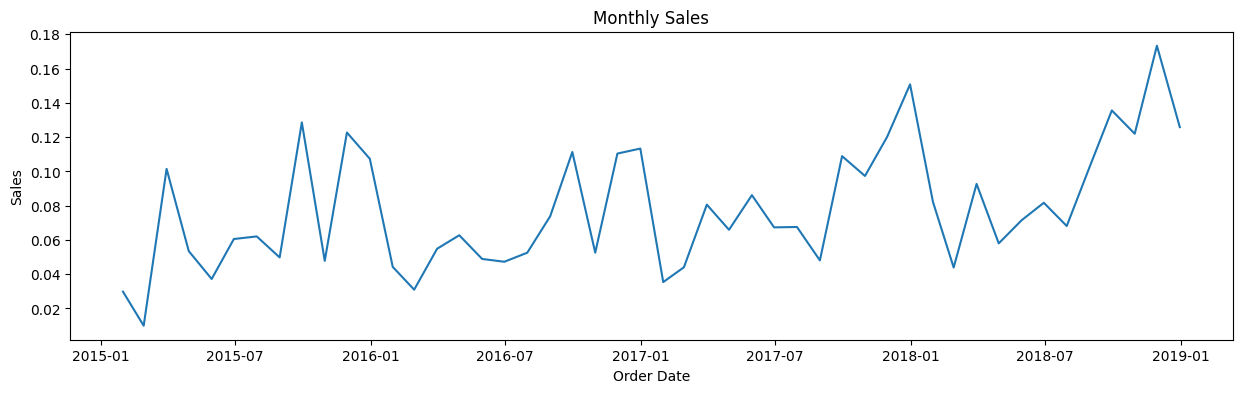

In [98]:
plt.figure(figsize=(15, 4))  
sns.lineplot(x='Order Date', y='Sales', data=sale_monthly)
plt.title('Monthly Sales')
plt.show()

# ARIMA

In [100]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.8 MB/s eta 0:00:00:00:010:01


In [101]:
from pmdarima import auto_arima

model_param = auto_arima(sale_monthly, seasonal=True, m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-199.342, Time=1.45 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-164.801, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-192.532, Time=0.32 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-166.680, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-183.133, Time=0.73 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-194.135, Time=0.88 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-197.552, Time=1.93 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-175.322, Time=0.42 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=-201.233, Time=1.54 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=-203.517, Time=1.25 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=-202.779, Time=0.73 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept

/tmp/ipykernel_34/3251482731.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_copy['Sales'].resample('M').sum()
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26108D+00    |proj g|=  5.56712D-01

At iterate    5    f=  1.03227D+00    |proj g|=  2.71715D-01

At iterate   10    f=  9.97535D-01    |proj g|=  6.72342D-02

At iterate   15    f=  9.87927D-01    |proj g|=  3.03545D-02

At iterate   20    f=  9.86758D-01    |proj g|=  9.71542D-03

At iterate   25    f=  9.86482D-01    |proj g|=  7.99506D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     44      1     0     0   

/tmp/ipykernel_34/3251482731.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_extended_index = pd.date_range(start=df_monthly.index[-1], periods=13, freq='M')
/tmp/ipykernel_34/3251482731.py:29: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  forecast_extended.predicted_mean[0] = df_monthly.iloc[-1]


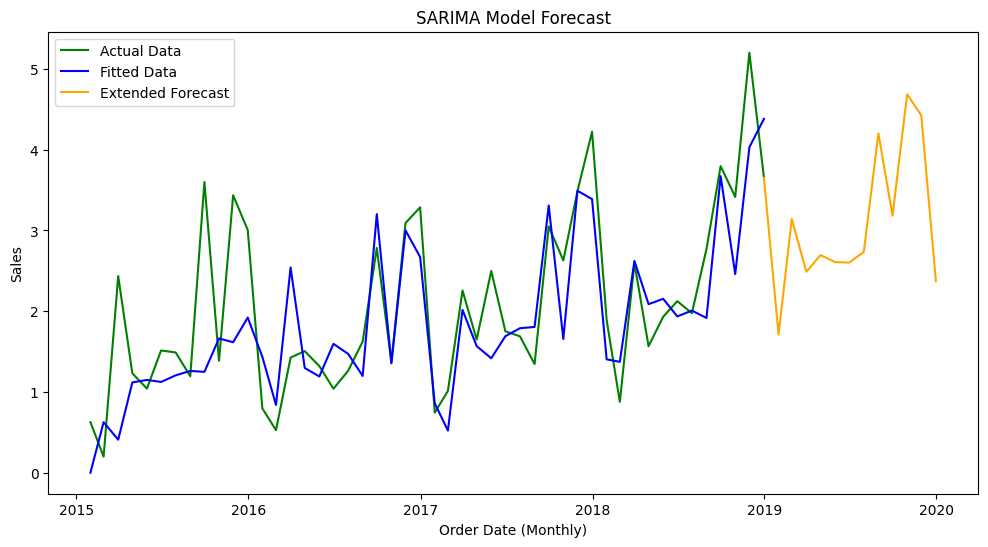

R-squared score for fitted data: 0.55


In [102]:
import statsmodels.api as sm

df_copy['Order Date'] = pd.to_datetime(df_copy['Order Date'])

# Set 'Order Date' as the index
df_copy.set_index('Order Date', inplace=True)

# Resample the data to monthly frequency and sum the sales for each month
df_monthly = df_copy['Sales'].resample('M').sum()

# Define SARIMA model hyperparameters, defined after fine tuning
order = (0, 1, 1)  # (p, d, q) - Non-seasonal order
seasonal_order = (1, 0, 1, 12)  # (P, D, Q, S) - Seasonal order

#order = (0, 1, 1)  # (p, d, q) - Non-seasonal order
#seasonal_order = (2, 1, 1, 12)  # (P, D, Q, S) - Seasonal order

# Initialize the SARIMA model
sarima_model = sm.tsa.SARIMAX(df_monthly, order=order, seasonal_order=seasonal_order)

# Fit the SARIMA model to all of the actual data
sarima_model_fit = sarima_model.fit()

# Make out-of-sample forecasts for the following twelve months
forecast_extended_index = pd.date_range(start=df_monthly.index[-1], periods=13, freq='M')
forecast_extended = sarima_model_fit.get_forecast(steps=13, index=forecast_extended_index)

# Set the first value of the extended forecast to be the last value of the actual data
forecast_extended.predicted_mean[0] = df_monthly.iloc[-1]

# Calculate R-squared score for the fitted data
fitted = sarima_model_fit.fittedvalues  # Fitted values for all the actual data
r2_fitted = 1 - np.sum((df_monthly - fitted) ** 2) / np.sum((df_monthly - np.mean(df_monthly)) ** 2)

# Plot the actual data, fitted data, and extended forecast
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly, label='Actual Data', color='green')
plt.plot(df_monthly.index, fitted, label='Fitted Data', color='blue')
plt.plot(forecast_extended_index, forecast_extended.predicted_mean, label='Extended Forecast', color='orange')

plt.legend()
plt.xlabel('Order Date (Monthly)')
plt.ylabel('Sales')
plt.title('SARIMA Model Forecast')
plt.show()

# Display R-squared score for the fitted data
print(f"R-squared score for fitted data: {r2_fitted:.2f}")

# Prophet

In [103]:
!pip install prophet

In [105]:
df_copy = df[['Order Date', 'Sales']].copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9789 non-null   datetime64[ns]
 1   Sales       9789 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 229.4 KB


/tmp/ipykernel_34/3776956409.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df_copy.resample('M', on='Order Date').sum()
16:23:57 - cmdstanpy - INFO - Chain [1] start processing
16:23:58 - cmdstanpy - INFO - Chain [1] done processing
/opt/conda/lib/python3.10/site-packages/prophet/forecaster.py:1796: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


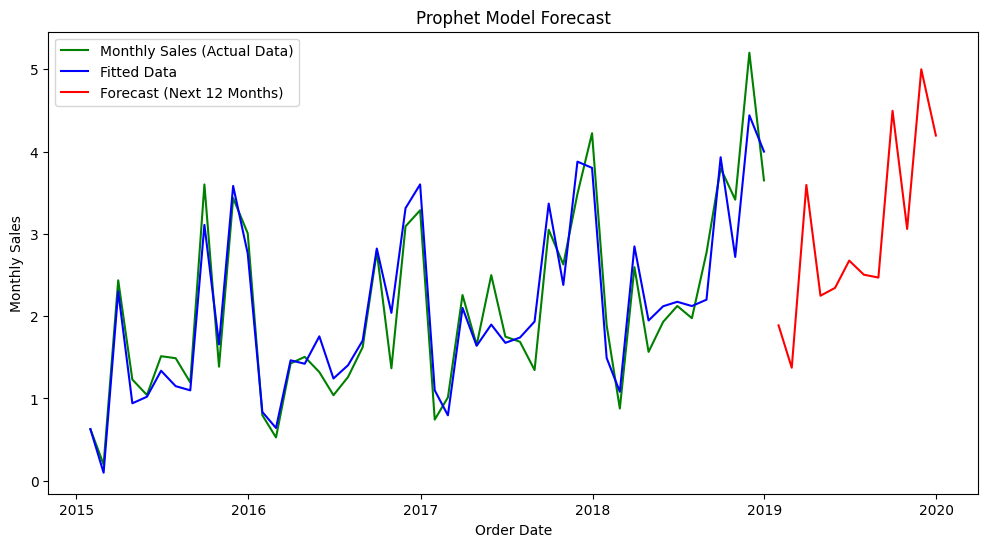

R-squared score for fitted data: 0.91


In [106]:
from prophet import Prophet

df_copy['Order Date'] = pd.to_datetime(df_copy['Order Date'])

# Resample the data to monthly frequency and sum the sales for each month
monthly_data = df_copy.resample('M', on='Order Date').sum()

# Rename columns as 'ds' and 'y' as required by Prophet
monthly_data.reset_index(inplace=True)
monthly_data = monthly_data.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Initialize and fit the Prophet model
model = Prophet()
model.fit(monthly_data)

# Create a future dataframe for the next 12 months
future = model.make_future_dataframe(periods=12, freq='M')

# Make forecasts for the future
forecast = model.predict(future)

# Extract the actual data and forecast for the next 12 months
actual_data = monthly_data['y']
fitted_data = forecast['yhat'][:len(monthly_data)]  # Fitted values for the historical data
forecast_data = forecast['yhat'][len(monthly_data):]

# Calculate R-squared score for the fitted data
r2_fitted = 1 - np.sum((actual_data - fitted_data) ** 2) / np.sum((actual_data - actual_data.mean()) ** 2)

# Plot the actual data, fitted data, and forecast for the next 12 months
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['ds'], actual_data, label='Monthly Sales (Actual Data)', color='green')
plt.plot(monthly_data['ds'], fitted_data, label='Fitted Data', color='blue')
plt.plot(forecast['ds'][len(monthly_data):], forecast_data, label='Forecast (Next 12 Months)', color='red')

plt.legend()
plt.xlabel('Order Date')
plt.ylabel('Monthly Sales')
plt.title('Prophet Model Forecast')
plt.show()

# Display R-squared score for the fitted data
print(f"R-squared score for fitted data: {r2_fitted:.2f}")